---
# Lab 3 An object-oriented Ising model

**PYU33C01 Computational Simulation I, Computational Physics (Christie)**


---
## What are the objectives of this lab?

* Understand the structure and behavior of the 2D Ising model.
* Refactor procedural code into an object-oriented design.
* Use classes to encapsulate data and behavior.
* Interact with GenAI to debug, extend, and analyze the object-oriented  code.

---
## The procedural implementation of the Ising model

The Python file _IsingModelProcedural.py_ can be downloaded from BlackBoards. It contains the code developed in the lecture notebook to simulate a 2D Ising spin system composed of an $L \times L$  square array of spins. The code uses procedural programming techniques and is based on four function definitions. The skeleton outlines are shown below:

```python
def init_spins(L):
    # allocate random spin orientations [-1,+1] to a 2D NumPy LxL array

def delta_energy(spins, m, n):
    # calculate energy of a spin at (m,n) with its nearest neighborings. 
    # It can be negative or positive depending on the value of the spin at (m,n) and the values of neighboring spins

def metropolis(spins, kT):
    # randomly select spin and calculate the energy associated with the spin
    # use metropolis criterion to decide whether to flip the spin or not at temperature kT
    # repeat for numSwaps=1000*L**2

def measure(spins):
    # magnetiztion is the average spin value
```

---
The main code for running the procedutal simulation is

```python
L = 50  
temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
magnetization = []

spins = init_spins(L)

start_time = time.time()

for kT in temp:
    spins = metropolis(spins, kT)
    mag = measure(spins)
    magnetization.append(mag)
    
    plt.imshow(spins,cmap='bwr',interpolation='nearest')
    plt.title(f"kT={kT:,.2f}")
    plt.show()
    
end_time = time.time()
print(f"Simulation time: {int(end_time - start_time)} seconds")
```
The function _metropolis_ calls _delta_energy_ internally.

---
## Task 1

Using your GenAI assistant, generate an object-oriented program to simulate the 2D Ising model. The minimum requirements are that the object-oriented version should define a class for a spin object and the spins should be encapsulated in a IsingLattice class. It should have the same number of spins and run over the same temperature range as the procedural program.

Be aware that uploading the procedural program and asking your GenAI assistant to transcribe it into an object-oriented version tends to produce a program that does not take advantage of many object-oriented features.

### Given IsingModelProcedural script.

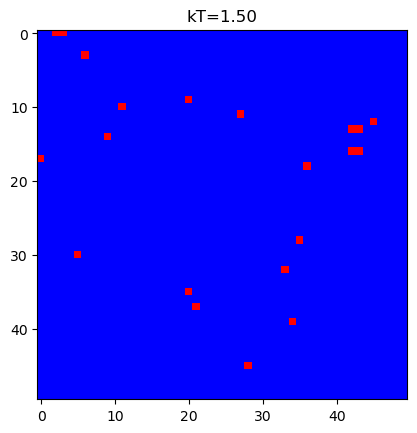

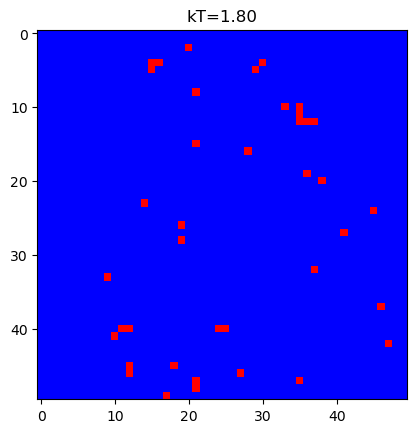

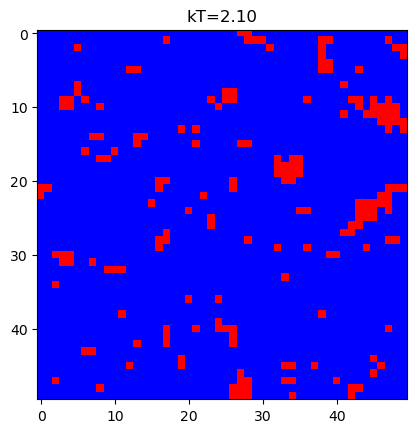

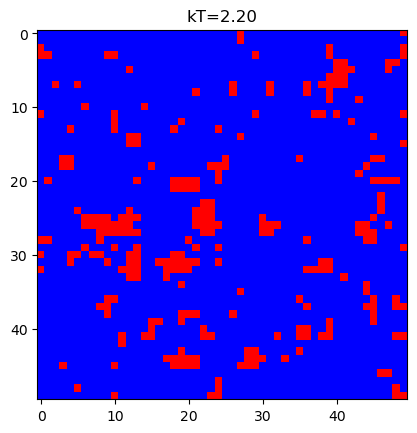

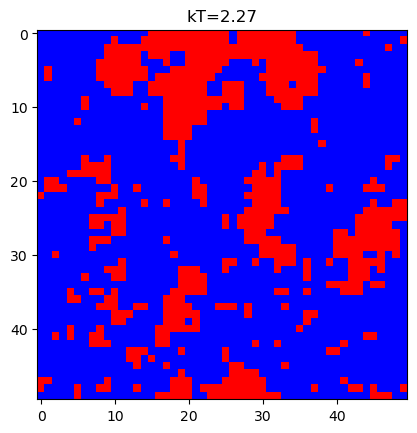

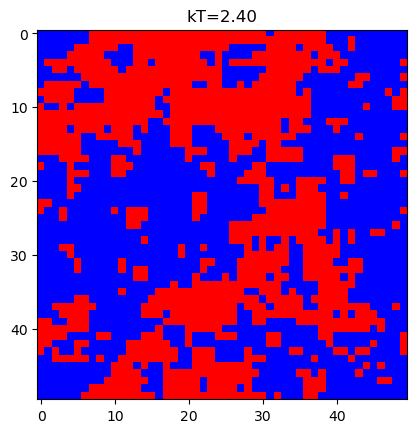

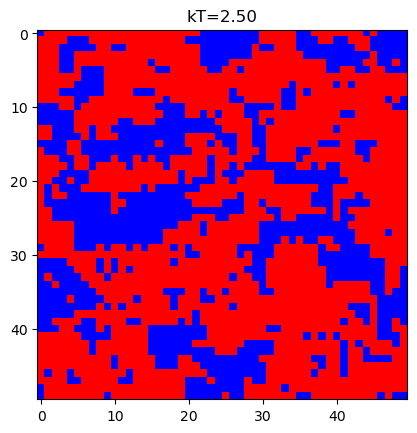

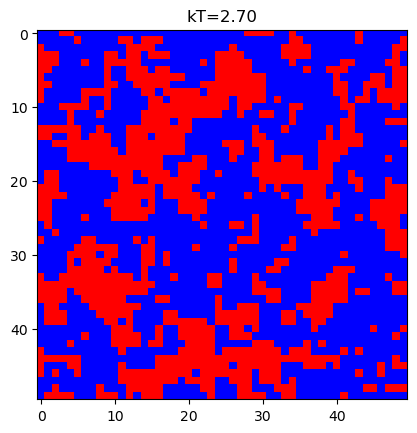

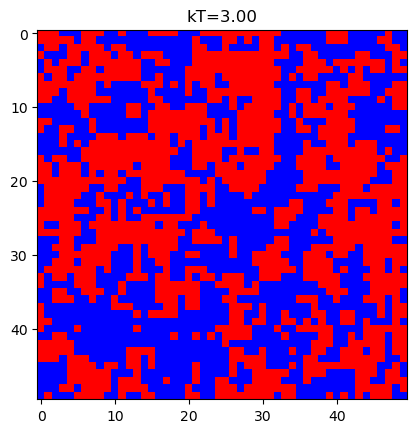

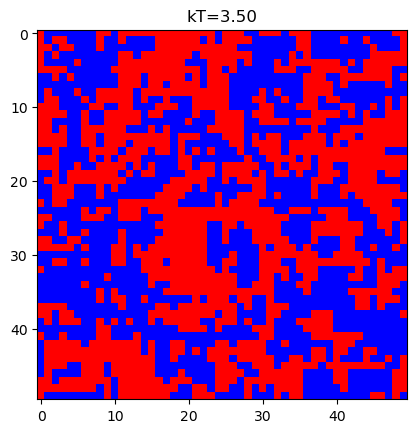

Simulation time: 281 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

#----------------------function definitions------------------------------------
def init_spins(L):
    # allocate random spin orientations [-1,+1] to LxL lattice
    spins = np.random.choice([-1, 1],size=(L, L))
    return spins

def delta_energy(spins, m, n):
    # calculate interaction energy of a spin at (m,n) with neighboring spins
    L = spins.shape[0]
    J = 1
    spin = spins[m, n]
    neighbors = spins[(m+1)%L, n] + spins[(m-1)%L, n] + spins[m, (n+1)%L] + spins[m, (n-1)%L]
    return 2 * J * spin * neighbors

def metropolis(spins, kT):
    # randomly select spin and calculate the energy associated with the spin
    # use metropolis criterion at temp=kT to decide whether to flip spin
    # repeat for numSwaps=1000*L**2
    L = spins.shape[0]
    numSwaps = 1000*L**2
    for _ in range(numSwaps):
        m, n = np.random.randint(0, L, size=2)
        dE = delta_energy(spins, m, n)
        if dE < 0 or np.random.rand() < np.exp(-dE / kT):
            spins[m, n] *= -1
    return spins

def measure(spins):
    # magnetiztion is the average spin value
    return abs(np.mean(spins))

#-----------------------------main program-------------------------------------
L = 50  
temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
magnetization = []

spins = init_spins(L)

start_time = time.time()

for kT in temp:
    spins = metropolis(spins, kT)
    mag = measure(spins)
    magnetization.append(mag)
    
    plt.imshow(spins,cmap='bwr',interpolation='nearest')
    plt.title(f"kT={kT:,.2f}")
    plt.show()
    
end_time = time.time()
print(f"Simulation time: {int(end_time - start_time)} seconds")


Initial only changing into OOP

Answer for task 1, initial AI Version.

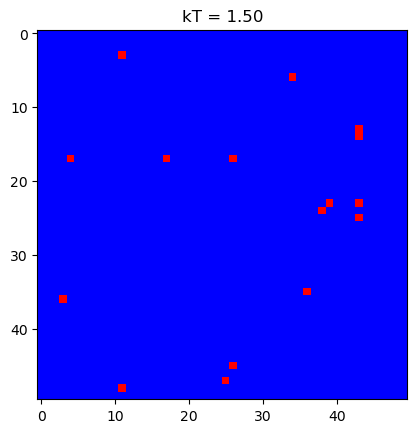

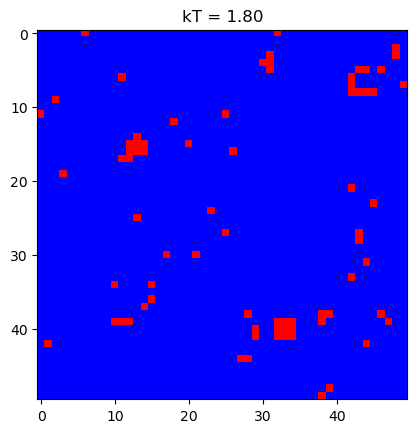

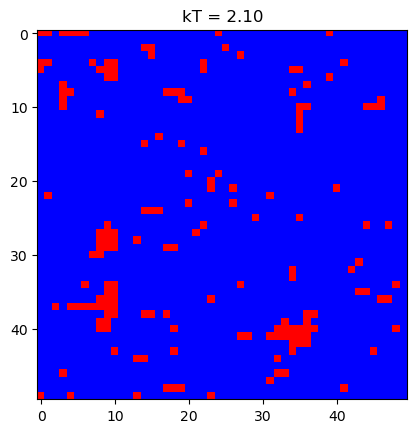

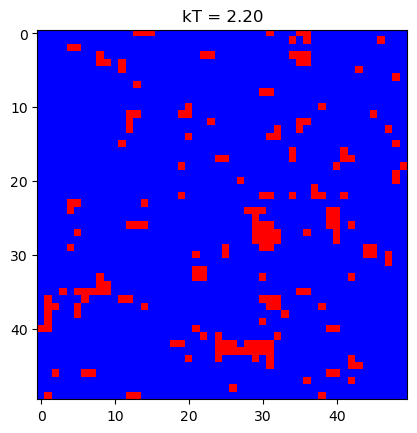

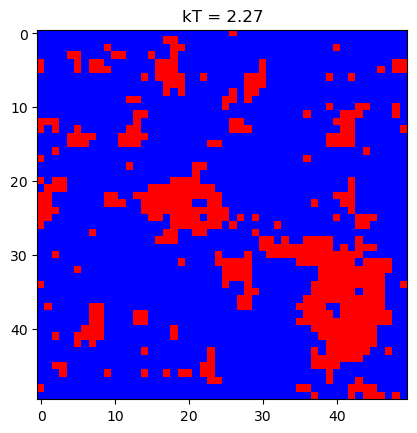

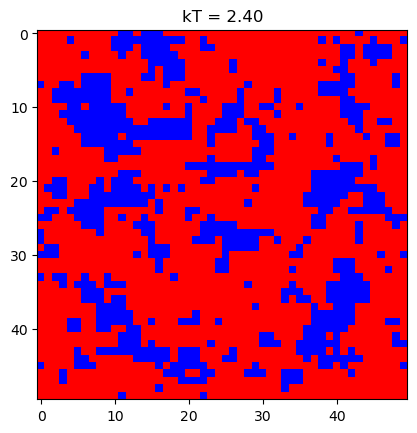

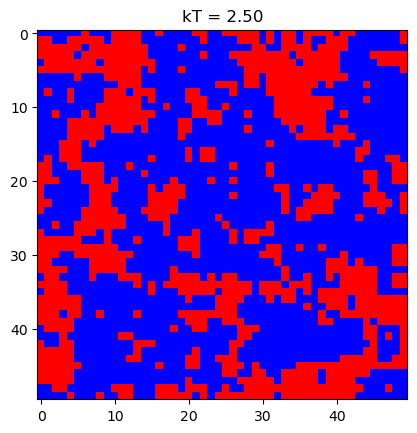

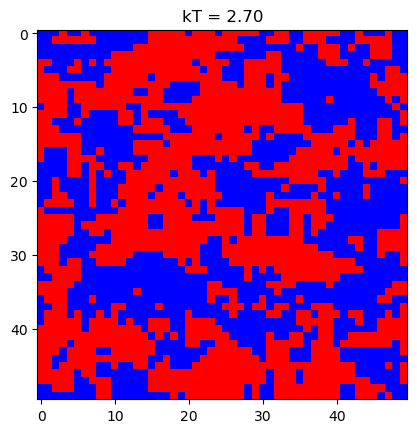

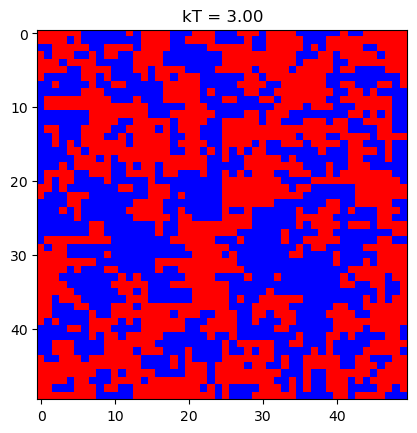

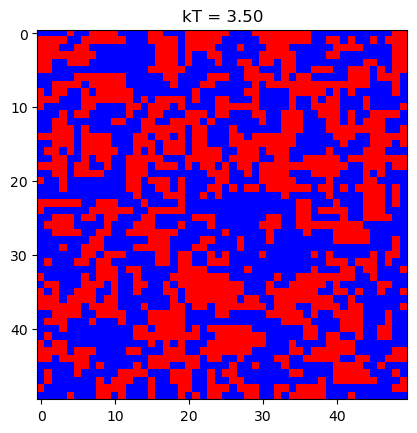

Simulation time: 324 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Contains all spins and simulation logic
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics"""
    
    def __init__(self, L, J=1.0):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        """
        self.L = L
        self.J = J
        self.spins = [[Spin() for _ in range(L)] for _ in range(L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self.spins[m][n].value
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self.spins[m][n].flip()
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self.get_spin_value((m+1) % L, n) +
                self.get_spin_value((m-1) % L, n) +
                self.get_spin_value(m, (n+1) % L) +
                self.get_spin_value(m, (n-1) % L))
    
    def delta_energy(self, m, n):
        """Energy change if spin at (m,n) is flipped"""
        spin = self.get_spin_value(m, n)
        neighbors = self.get_neighbors_sum(m, n)
        return 2 * self.J * spin * neighbors
    
    def metropolis(self, kT):
        """Run Metropolis algorithm at temperature kT"""
        L = self.L
        num_swaps = 1000 * L * L
        
        for _ in range(num_swaps):
            m, n = np.random.randint(0, L, size=2)
            dE = self.delta_energy(m, n)
            
            if dE < 0 or np.random.rand() < np.exp(-dE / kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization"""
        total = sum(self.get_spin_value(m, n) 
                   for m in range(self.L) 
                   for n in range(self.L))
        return abs(total / (self.L * self.L))
    
    def visualize(self, kT=None):
        """Display spin configuration"""
        # Convert to numpy array for plotting
        spin_array = np.array([[self.get_spin_value(m, n) 
                               for n in range(self.L)] 
                              for m in range(self.L)])
        
        plt.imshow(spin_array, cmap='bwr', interpolation='nearest')
        if kT is not None:
            plt.title(f"kT = {kT:.2f}")
        plt.show()


# ============================================================================
# MAIN PROGRAM - Same as procedural version
# ============================================================================
if __name__ == "__main__":
    
    L = 50
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    # Create lattice
    lattice = IsingLattice(L)
    
    start_time = time.time()
    
    for kT in temp:
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        
        lattice.visualize(kT)
    
    end_time = time.time()
    print(f"Simulation time: {int(end_time - start_time)} seconds")

---
## Task 2

Test and critically evaluate the code. Make (at least) 3 modifications/improvements to your new Python class.

Version after imrpovement.

## Brief Summary of Optimizations

### Performance Improvements:

1. **NumPy Array Backend** 
   - **Before**: 2D list of 2,500 individual `Spin` Python objects
   - **After**: Single NumPy array `_spin_array`
   - Eliminates object creation overhead and method call overhead

2. **Pre-generated Random Numbers** 
   - **Before**: Generated random numbers one at a time in loop
   - **After**: Generate all random positions and values upfront in bulk

3. **Vectorized Magnetization** 
   - **Before**: Nested loops with `sum()` over all spins
   - **After**: Single `np.mean()` call

4. **Direct Array Access** 
   - **Before**: `self.get_spin_value(m, n)` → method call → object access
   - **After**: `self._spin_array[m, n]` → direct array indexing

---

### Overall Result:
- **Much faster** for L=50, should run time comparisons. 
- **Still maintains OOP structure** (Spin class + encapsulation)
- **Backward compatible** via `@property` decorator for `spins` attribute

---

### Key Principle:
**"OOP interface with NumPy performance"** - Use Python objects for structure/readability, but NumPy arrays for computation speed.

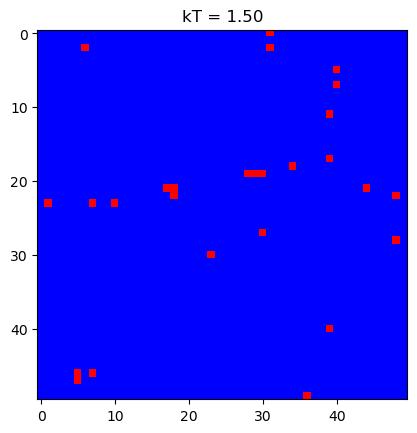

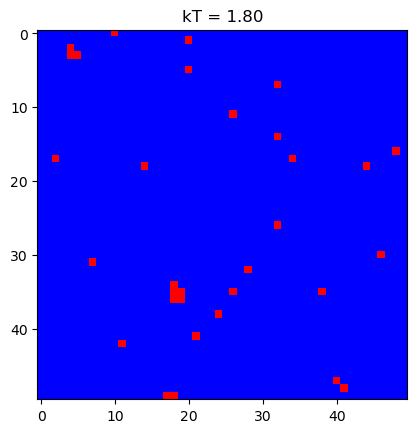

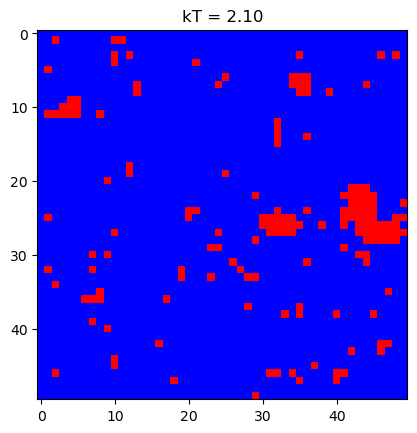

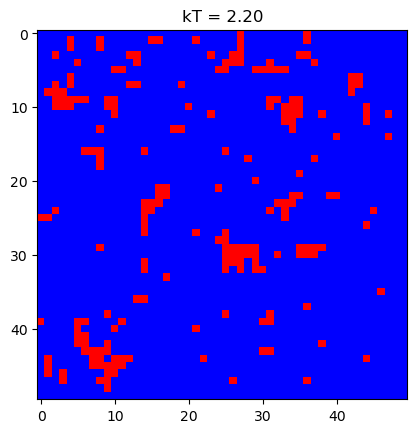

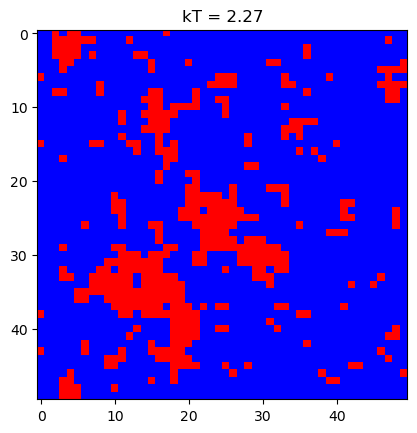

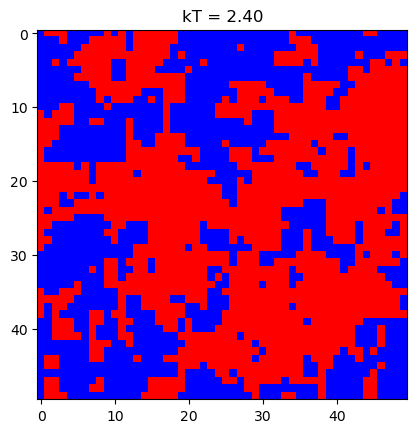

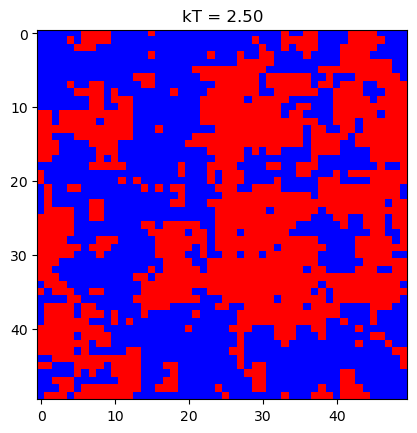

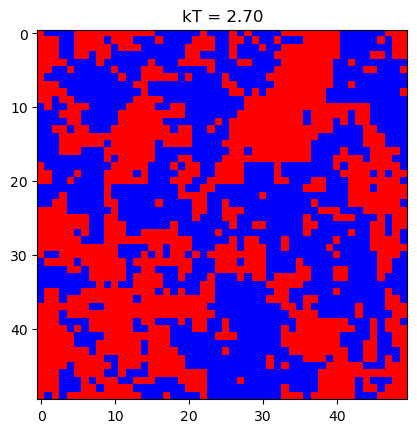

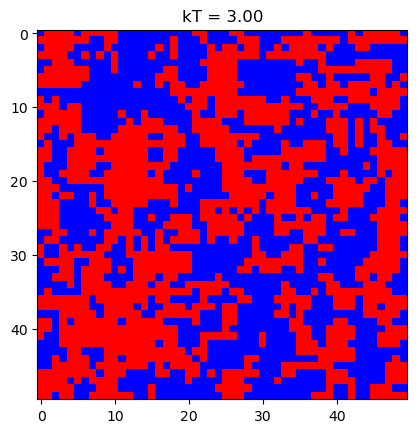

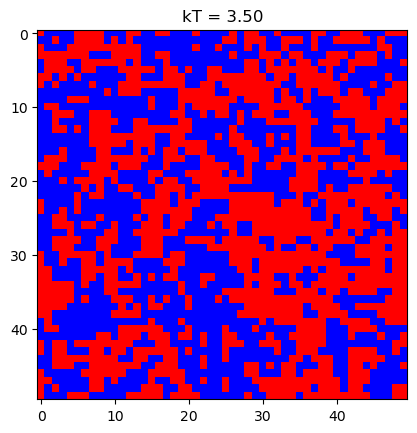

Simulation time: 126 seconds


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Optimized with NumPy backend
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics (optimized)"""
    
    def __init__(self, L, J=1.0):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        """
        self.L = L
        self.J = J
        # Use NumPy array internally for speed
        self._spin_array = np.random.choice([-1, 1], size=(L, L))
    
    @property
    def spins(self):
        """
        Returns spins as 2D list of Spin objects (for OOP compatibility)
        Only created when accessed (lazy evaluation)
        """
        return [[Spin(value=self._spin_array[m, n]) 
                 for n in range(self.L)] 
                for m in range(self.L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self._spin_array[m, n]
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self._spin_array[m, n] *= -1
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self._spin_array[(m+1) % L, n] +
                self._spin_array[(m-1) % L, n] +
                self._spin_array[m, (n+1) % L] +
                self._spin_array[m, (n-1) % L])
    
    def delta_energy(self, m, n):
        """Energy change if spin at (m,n) is flipped"""
        spin = self._spin_array[m, n]
        neighbors = self.get_neighbors_sum(m, n)
        return 2 * self.J * spin * neighbors
    
    def metropolis(self, kT):
        """Run Metropolis algorithm at temperature kT (optimized)"""
        L = self.L
        num_swaps = 1000 * L * L
        
        # Pre-generate all random numbers (faster)
        positions = np.random.randint(0, L, size=(num_swaps, 2))
        randoms = np.random.rand(num_swaps)
        
        for i in range(num_swaps):
            m, n = positions[i]
            dE = self.delta_energy(m, n)
            
            if dE < 0 or randoms[i] < np.exp(-dE / kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization (optimized)"""
        return abs(np.mean(self._spin_array))
    
    def visualize(self, kT=None):
        """Display spin configuration"""
        plt.imshow(self._spin_array, cmap='bwr', interpolation='nearest')
        if kT is not None:
            plt.title(f"kT = {kT:.2f}")
        plt.show()

        


# ============================================================================
# MAIN PROGRAM
# ============================================================================
if __name__ == "__main__":
    
    L = 50
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    # Create lattice
    lattice = IsingLattice(L)
    
    start_time = time.time()
    
    for kT in temp:
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        
        lattice.visualize(kT)
    
    end_time = time.time()
    print(f"Simulation time: {int(end_time - start_time)} seconds")

Second Round of improvements.

kT = 1.50: M = 0.998


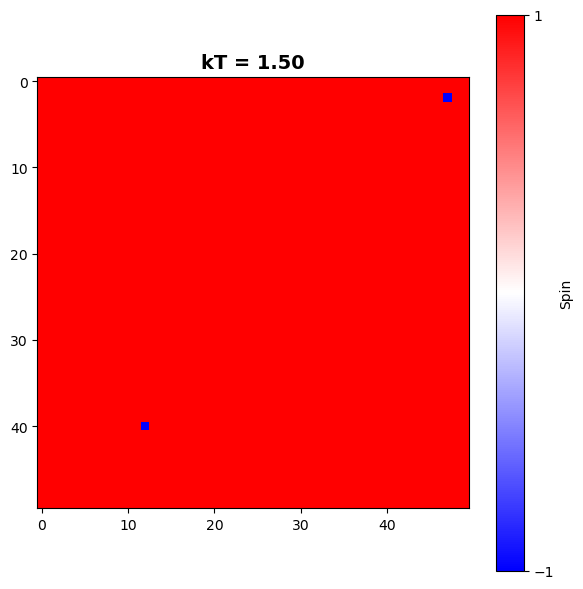

kT = 1.80: M = 0.995


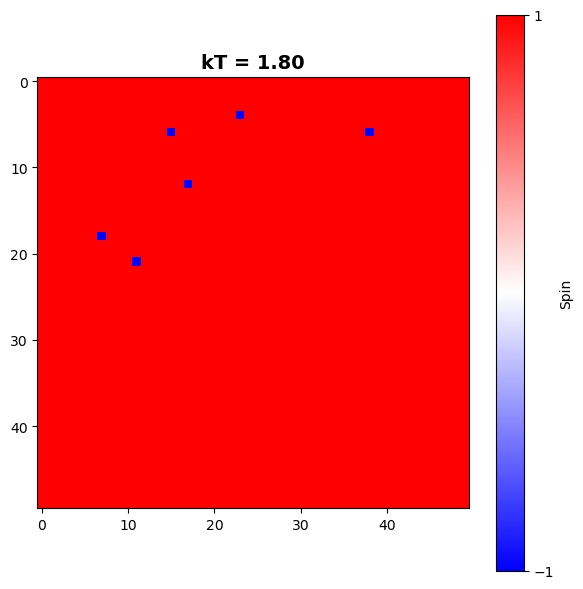

kT = 2.10: M = 0.992


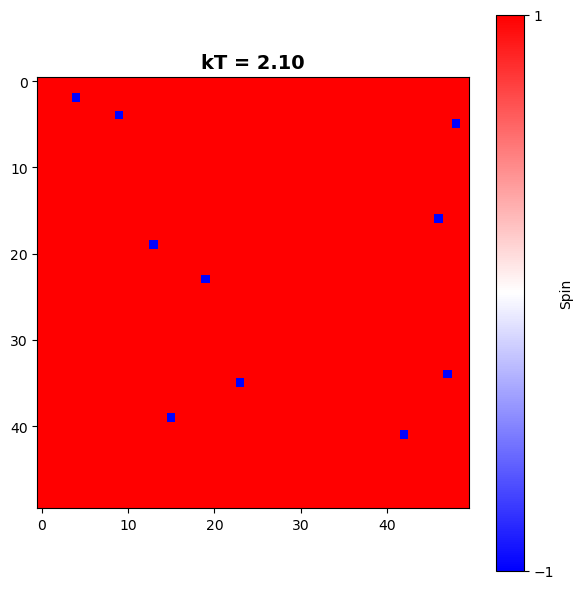

kT = 2.20: M = 0.977


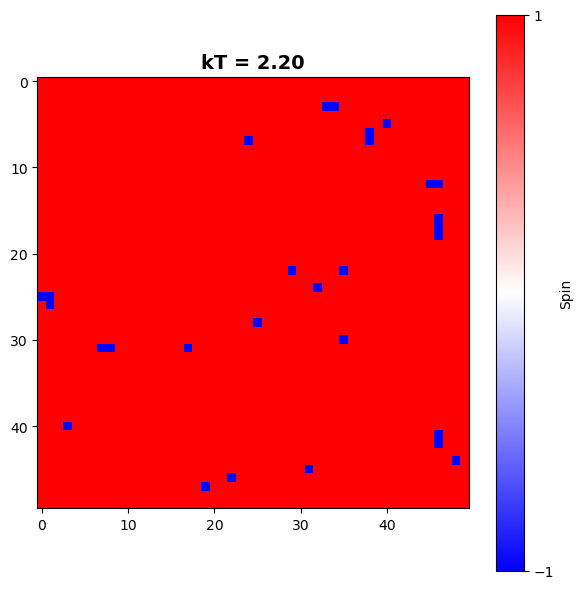

kT = 2.27: M = 0.964


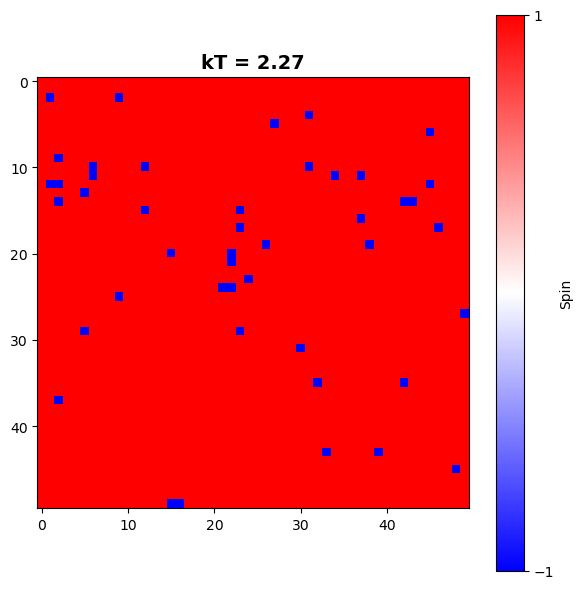

kT = 2.40: M = 0.952


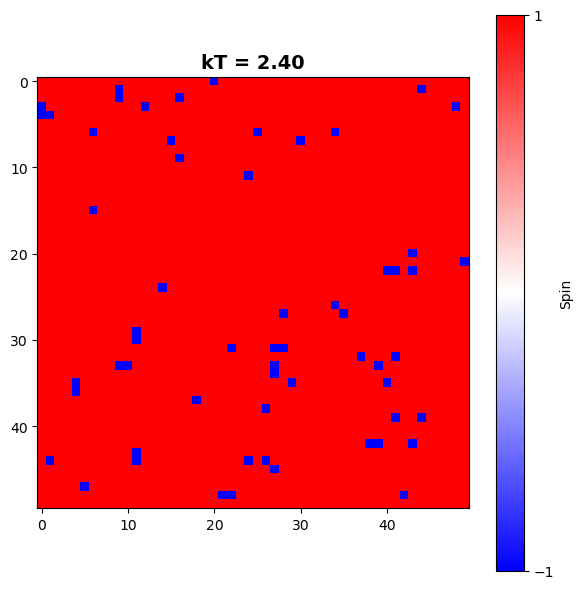

kT = 2.50: M = 0.944


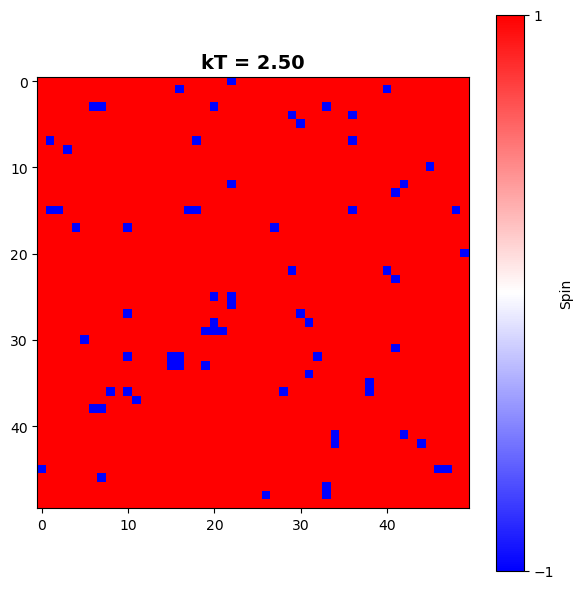

kT = 2.70: M = 0.913


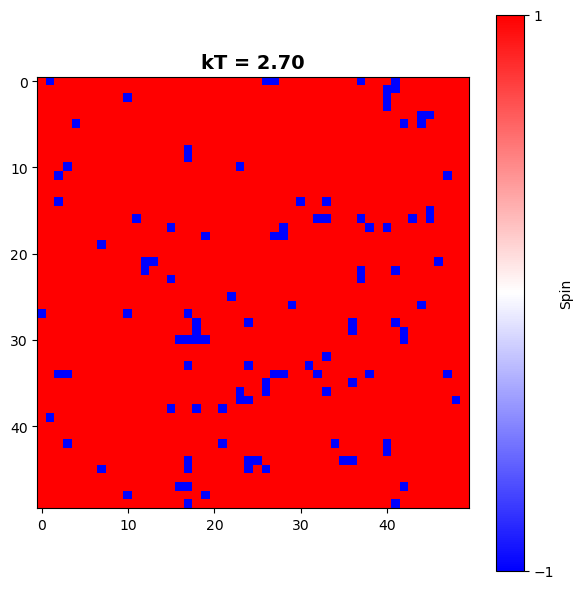

kT = 3.00: M = 0.890


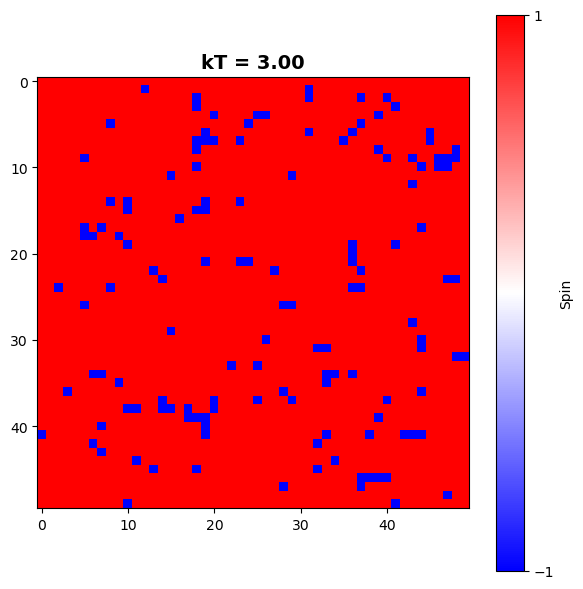

kT = 3.50: M = 0.790


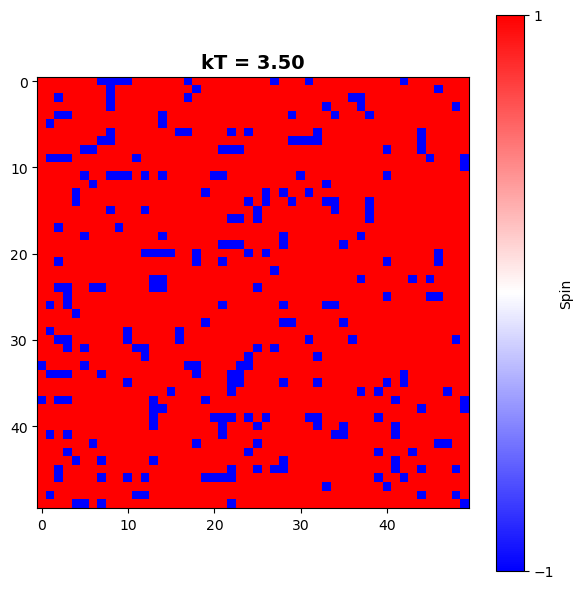


Simulation time: 3 seconds


In [4]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import time


@njit
def delta_energy_numba(spins, h, J, i, j, L):
    """Compute ΔE for a single site (i, j) using periodic boundaries."""
    spin = spins[i, j]

    ip = (i + 1) % L
    im = (i - 1) % L
    jp = (j + 1) % L
    jm = (j - 1) % L

    neighbors = spins[ip, j] + spins[im, j] + spins[i, jp] + spins[i, jm]
    return 2 * spin * (J * neighbors + h[i, j])
@njit
def metropolis_numba(spins, h, J, kT, num_swaps):
    """Numba-accelerated Metropolis sweep. Updates spins IN PLACE."""
    L = spins.shape[0]
    flips = 0

    for _ in range(num_swaps):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        dE = delta_energy_numba(spins, h, J, i, j, L)

        if dE <= 0 or np.random.rand() < np.exp(-dE / kT):
            spins[i, j] = -spins[i, j]
            flips += 1

    return flips



# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Optimized with NumPy backend
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics (optimized)"""
    
    def __init__(self, L, J=1.0, kT=2.27, h=0.0, initial_state='random'):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        kT : float
            Temperature (in units of J/k_B)
        h : float
        initial_state : str or np.ndarray
            Initial spin configuration:
            - 'random': Random ±1 spins (default)
            - 'up': All spins +1 (ferromagnetic)
            - 'down': All spins -1 (ferromagnetic)
            - 'checkerboard': Alternating ±1 pattern (antiferromagnetic)
            - np.ndarray: Custom L×L configuration
        """
        self.L = L
        self.J = J
        self.kT = kT
        if np.isscalar(h):
            self.h = np.full((L, L), h, dtype=float)
        else:
            if h.shape != (L, L):
                raise ValueError(f"Magnetic field must have shape ({L}, {L})")
            self.h = h.astype(float)
 
        self.initial_state = initial_state  # Store for reset
        self._spin_array = self._initialize_spins(initial_state)
    
    def _initialize_spins(self, initial_state):
        """
        Initialize spins based on initial_state parameter
        
        Parameters:
        -----------
        initial_state : str or np.ndarray
            Type of initial configuration
            
        Returns:
        --------
        np.ndarray : L×L array of ±1 spins
        """
        # Check for custom array FIRST (before string comparisons)
        if isinstance(initial_state, np.ndarray):
            # Custom configuration provided
            if initial_state.shape != (self.L, self.L):
                raise ValueError(f"Custom initial_state must have shape ({self.L}, {self.L})")
            return initial_state.copy()
        
        # Now check string options
        if initial_state == 'random':
            return np.random.choice([-1, 1], size=(self.L, self.L))
        
        elif initial_state == 'up':
            return np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'down':
            return -np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'checkerboard':
            pattern = np.zeros((self.L, self.L), dtype=int)
            # Create checkerboard pattern
            pattern[::2, ::2] = 1    # Even rows, even columns: +1
            pattern[1::2, 1::2] = 1  # Odd rows, odd columns: +1
            pattern[::2, 1::2] = -1  # Even rows, odd columns: -1
            pattern[1::2, ::2] = -1  # Odd rows, even columns: -1
            return pattern
        
        else:
            raise ValueError(f"Unknown initial_state: {initial_state}. "
                        f"Use 'random', 'up', 'down', 'checkerboard', or provide np.ndarray")
    
    @property
    def spins(self):
        """
        Returns spins as 2D list of Spin objects (for OOP compatibility)
        Only created when accessed (lazy evaluation)
        """
        return [[Spin(value=self._spin_array[m, n]) 
                 for n in range(self.L)] 
                for m in range(self.L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self._spin_array[m, n]
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self._spin_array[m, n] *= -1
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self._spin_array[(m+1) % L, n] +
                self._spin_array[(m-1) % L, n] +
                self._spin_array[m, (n+1) % L] +
                self._spin_array[m, (n-1) % L])

    '''   
    def delta_energy(self, m, n):
        spin = self._spin_array[m, n]
        neighbors = self.get_neighbors_sum(m, n)
        h_local = self.h[m, n]
        return 2 * spin * (self.J * neighbors + h_local)
  # ← Add field term
    '''

    def set_temperature(self, kT):
        """
        Set the temperature for the simulation
        
        Parameters:
        -----------
        kT : float
            Temperature (in units of J/k_B)
        """
        self.kT = kT
    '''  
    def metropolis(self, kT=None):
        """
        Run Metropolis algorithm at temperature kT (optimized) and 
        return the number of spin flips.
        
        Parameters:
        -----------
        kT : float, optional
            Temperature (if provided, updates self.kT)
        """
        if kT is not None:
            self.kT = kT

        L = self.L
        num_swaps = 1000 * L * L

        # Pre-generate random positions and random acceptance tests
        positions = np.random.randint(0, L, size=(num_swaps, 2))
        randoms = np.random.rand(num_swaps)

        flips = 0  # spin-flip counter

        # Loop over all attempts
        for n in range(num_swaps):
            i, j = positions[n]

            # Compute ΔE using your delta_energy() method
            dE = self.delta_energy(i, j)

            # Accept flip?
            if dE <= 0 or randoms[n] < np.exp(-dE / self.kT):
                self._spin_array[i, j] *= -1
                flips += 1

        return flips   
    '''

    def metropolis(self, kT=None):
        """Call Numba-accelerated Metropolis sweep."""
        if kT is not None:
            self.kT = kT

        num_swaps = 1000 * self.L * self.L

        # Call Numba function (updates array in-place)
        flips = metropolis_numba(
            self._spin_array,
            self.h,
            self.J,
            self.kT,
            num_swaps
        )

        return flips

    
    def magnetization(self):
        """Calculate average magnetization (optimized)"""
        return abs(np.mean(self._spin_array))
    
    def visualize(self, kT=None, title=None):
        """
        Display spin configuration
        
        Parameters:
        -----------
        kT : float, optional
            Temperature for title (uses self.kT if not provided)
        title : str, optional
            Custom title for the plot
        """
        plt.figure(figsize=(6, 6))
        plt.imshow(self._spin_array, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
        
        if title:
            plt.title(title, fontsize=14, fontweight='bold')
        else:
            temp_to_show = kT if kT is not None else self.kT
            plt.title(f"kT = {temp_to_show:.2f}", fontsize=14, fontweight='bold')
        
        plt.colorbar(label='Spin', ticks=[-1, 1])
        plt.tight_layout()
        plt.show()
        
    def reset(self, initial_state=None):
        """
        Reset lattice to initial configuration
        
        Parameters:
        -----------
        initial_state : str or np.ndarray, optional
            If provided, use this configuration
            If None, use the original initial_state from __init__
        """
        if initial_state is None:
            initial_state = self.initial_state
        else:
            self.initial_state = initial_state  # Update stored initial state
        
        self._spin_array = self._initialize_spins(initial_state)


    def set_magnetic_field(self, h):
        """
        Set magnetic field h. Accepts either:
        - scalar (broadcast to LxL)
        - LxL NumPy array
        """
        if np.isscalar(h):
            # Broadcast scalar to full field
            self.h = np.full((self.L, self.L), h, dtype=np.float64)

        else:
            # Convert to array
            h = np.asarray(h)

            # Validate shape
            if h.shape != (self.L, self.L):
                raise ValueError(
                    f"Magnetic field array must have shape ({self.L}, {self.L}), "
                    f"but got {h.shape}"
                )

            # Ensure numba-compatible dtype
            self.h = h.astype(np.float64)


    def metropolis_step(self):
        """
        Perform one Monte Carlo sweep (L²  spin flip attempts)
        """
        L = self.L
        
        for _ in range(L * L):
            m, n = np.random.randint(0, L, size=2)
            dE = self.delta_energy(m, n)
            
            if dE < 0 or np.random.rand() < np.exp(-dE / self.kT):
                self.flip_spin(m, n)
    
    def energy(self):
        """
        Calculate total energy: E = -J Σ⟨i,j⟩ s_i·s_j - h Σ_i s_i
        
        Returns:
        --------
        float : Total energy
        """
        L = self.L
        
        # Part 1: Interaction energy (neighbor coupling)
        # Only count each pair ONCE (right and down neighbors)
        lattice_energy = 0.0
        for m in range(L):
            for n in range(L):
                spin = self._spin_array[m, n]
                right_neighbor = self._spin_array[m, (n+1) % L]
                down_neighbor = self._spin_array[(m+1) % L, n]
                h_local = self.h[m, n]
                # Each pair counted once
                lattice_energy += spin * right_neighbor + spin * down_neighbor + h_local * spin
        
        lattice_energy *= -self.J
        
        
        return float(lattice_energy)

# ============================================================================
# MAIN PROGRAM - Demonstrating different initial states
# ============================================================================
if __name__ == "__main__":
    
    '''
    # Test different initial states
    print("Testing different initial states:\n")
    
    # 1. Random initial state (default)
    lattice_random = IsingLattice(L, initial_state='random')
    print(f"Random: Magnetization = {lattice_random.magnetization():.3f}")
    lattice_random.visualize(title="Initial State: Random")
    
    # 2. All spins up
    lattice_up = IsingLattice(L, initial_state='up')
    print(f"All Up: Magnetization = {lattice_up.magnetization():.3f}")
    lattice_up.visualize(title="Initial State: All Up")
    
    # 3. All spins down
    lattice_down = IsingLattice(L, initial_state='down')
    print(f"All Down: Magnetization = {lattice_down.magnetization():.3f}")
    lattice_down.visualize(title="Initial State: All Down")
    
    # 4. Checkerboard pattern
    lattice_check = IsingLattice(L, initial_state='checkerboard')
    print(f"Checkerboard: Magnetization = {lattice_check.magnetization():.3f}")
    lattice_check.visualize(title="Initial State: Checkerboard")
    
    # 5. Custom initial state (half up, half down)
    custom_config = np.ones((L, L), dtype=int)
    custom_config[:, L//2:] = -1  # Right half is down
    lattice_custom = IsingLattice(L, initial_state=custom_config)
    print(f"Custom (half-half): Magnetization = {lattice_custom.magnetization():.3f}")
    lattice_custom.visualize(title="Initial State: Custom (Half-Half)")
    
    print("\n" + "="*60)
    print("Running temperature sweep with 'up' initial state:")
    print("="*60)
    '''

    L = 50

    
    # Temperature sweep starting from all spins up
    lattice = IsingLattice(L, initial_state='random', kT=1.5, h=1.0)
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    start_time = time.time()
    
    for kT in temp:
        lattice.reset('up')  # Reset to all up for each temperature
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        print(f"kT = {kT:.2f}: M = {mag:.3f}")
        lattice.visualize(kT)
    
    end_time = time.time()
    print(f"\nSimulation time: {int(end_time - start_time)} seconds")

## Brief Summary of Three Improvements

### 1. **`reset()` Method**
- **What:** Reset lattice to initial spin configuration without creating new object
- **Why:** Enables multiple independent simulation runs; essential for statistical averaging
- **Usage:** `lattice.reset()` or `lattice.reset('up')`

### 2. **Temperature Storage (`self.kT`)**
- **What:** Store temperature as object attribute; added `set_temperature()` method
- **Why:** Lattice "knows" its state; cleaner API; required for Tasks 3-4
- **Usage:** `lattice.kT` to query, `lattice.set_temperature(3.0)` to change

### 3. **Configurable Initial State**
- **What:** Choose initial spin configuration: `'random'`, `'up'`, `'down'`, `'checkerboard'`, or custom array
- **Why:** Study equilibration, domain formation, phase transitions; essential for Task 5
- **Usage:** `IsingLattice(L=50, initial_state='up')`

### 4. **Using Number to speed up MH proccess and DE proccess**
- **What:** Massive speed up

---

**Impact:** Enhanced flexibility, better OOP design, enabled advanced physics exploration

---
## Task 3

Plot the average magnetisation $\langle M \rangle$ as a function of the magnetic field $h$ for system size $L=10$ and two different temperatures: $k_BT=1.0$ and $k_BT=4.0$ (assuming $J=1$).

Task 3: Magnetization vs Magnetic Field
System size: L = 10
Coupling: J = 1.0
Temperatures: kT = 1.0 (low), kT = 4.0 (high)
Magnetic field range: h ∈ [-5.0, 5.0]

Low Temperature: kT = 1.0
Sweeping magnetic field at kT = 1.0...
  h =  -5.00, <M> = -1.000
  h =  -4.09, <M> = -1.000
  h =  -3.08, <M> = -1.000
  h =  -2.07, <M> = -1.000
  h =  -1.06, <M> = -1.000
  h =  -0.05, <M> = -1.000
  h =   0.05, <M> = -1.000
  h =   1.06, <M> =  1.000
  h =   2.07, <M> =  1.000
  h =   3.08, <M> =  1.000
  h =   4.09, <M> =  1.000
  h =   5.00, <M> =  1.000

High Temperature: kT = 4.0
Sweeping magnetic field at kT = 4.0...
  h =  -5.00, <M> = -0.920
  h =  -4.09, <M> = -0.960
  h =  -3.08, <M> = -0.940
  h =  -2.07, <M> = -0.740
  h =  -1.06, <M> = -0.780
  h =  -0.05, <M> = -0.240
  h =   0.05, <M> =  0.040
  h =   1.06, <M> =  0.700
  h =   2.07, <M> =  0.880
  h =   3.08, <M> =  0.920
  h =   4.09, <M> =  0.920
  h =   5.00, <M> =  0.960

Plot saved as 'task3_magnetization_vs_field.png'


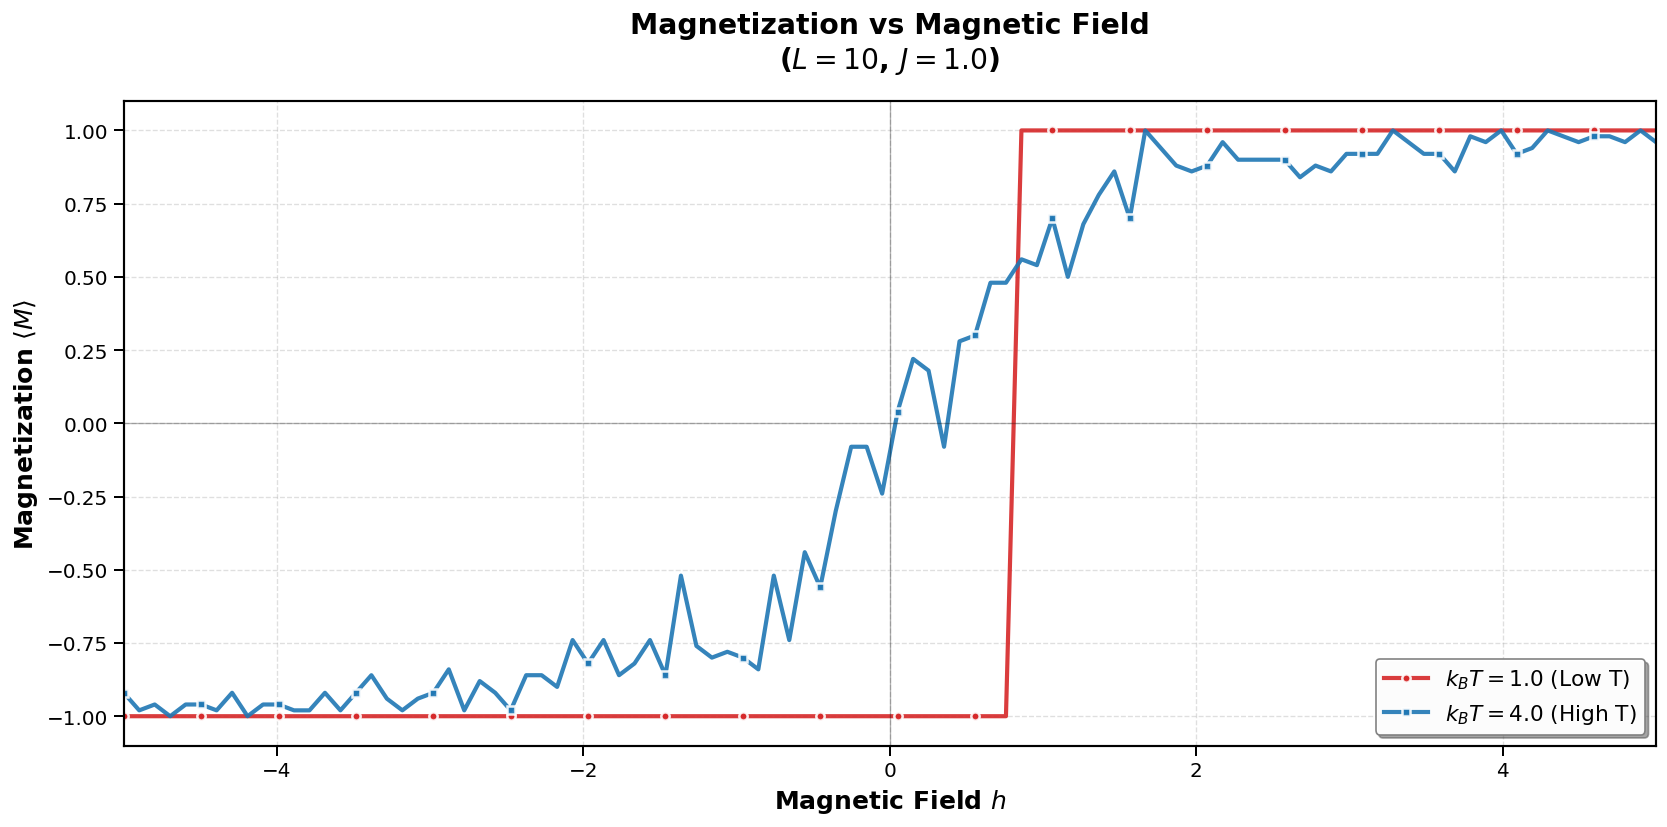


Summary Statistics

Low Temperature (kT = 1.0):
  M at h = 5.0: 1.000
  M at h = -5.0: -1.000
  M at h = 0: -1.000

High Temperature (kT = 4.0):
  M at h = 5.0: 0.960
  M at h = -5.0: -0.920
  M at h = 0: 0.040



In [5]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import time


# ============================================================================
# Task 3: Magnetization vs Magnetic Field
# ============================================================================

def sweep_magnetic_field(L, kT, h_values, J=1.0, num_sweeps=1000):
    """
    Sweep through magnetic field values and measure magnetization
    
    Parameters:
    -----------
    L : int
        Lattice size
    kT : float
        Temperature
    h_values : array
        Magnetic field values to sweep
    J : float
        Coupling constant
    num_sweeps : int
        Number of Monte Carlo sweeps per field value
        
    Returns:
    --------
    magnetizations : array
        Signed magnetization at each field value
    """
    magnetizations = []
    
    # Create lattice with random initial state
    lattice = IsingLattice(L=L, J=J, kT=kT, initial_state='random')
    
    print(f"Sweeping magnetic field at kT = {kT}...")
    
    for h in h_values:
        # Set magnetic field
        lattice.set_magnetic_field(h)
        
        # Equilibrate at this field value
        lattice.metropolis()
        
        # Measure SIGNED magnetization (not absolute value!)
        mag = np.mean(lattice._spin_array)
        magnetizations.append(mag)
        
        if abs(h) % 1.0 < 0.1:  # Print every ~1.0 field units
            print(f"  h = {h:6.2f}, <M> = {mag:6.3f}")
    
    return np.array(magnetizations)


if __name__ == "__main__":
    
    # ========================================================================
    # Parameters for Task 3
    # ========================================================================
    L = 10          # System size
    J = 1.0         # Coupling constant
    T_low = 1.0     # Low temperature
    T_high = 4.0    # High temperature
    
    # Magnetic field range: sweep from negative to positive
    h_values = np.linspace(-5, 5, 100)
    
    print("="*70)
    print("Task 3: Magnetization vs Magnetic Field")
    print("="*70)
    print(f"System size: L = {L}")
    print(f"Coupling: J = {J}")
    print(f"Temperatures: kT = {T_low} (low), kT = {T_high} (high)")
    print(f"Magnetic field range: h ∈ [{h_values[0]}, {h_values[-1]}]")
    print("="*70)
    
    # ========================================================================
    # Run simulations at two temperatures
    # ========================================================================
    
    # Low temperature (ordered phase)
    print(f"\n{'='*70}")
    print(f"Low Temperature: kT = {T_low}")
    print(f"{'='*70}")
    mag_low = sweep_magnetic_field(L, T_low, h_values, J=J)
    
    # High temperature (disordered phase)
    print(f"\n{'='*70}")
    print(f"High Temperature: kT = {T_high}")
    print(f"{'='*70}")
    mag_high = sweep_magnetic_field(L, T_high, h_values, J=J)
    
    # ========================================================================
    # Plot Results
    # ========================================================================
    
    fig, ax = plt.subplots(figsize=(14, 7), dpi=120)
    
    # Plot low temperature curve
    ax.plot(h_values, mag_low, 'o-', color='#d62728', linewidth=2.5, 
            markersize=5, markevery=5, label=f'$k_BT = {T_low}$ (Low T)', 
            alpha=0.9, markeredgewidth=1.5, markeredgecolor='white')
    
    # Plot high temperature curve
    ax.plot(h_values, mag_high, 's-', color='#1f77b4', linewidth=2.5, 
            markersize=5, markevery=5, label=f'$k_BT = {T_high}$ (High T)', 
            alpha=0.9, markeredgewidth=1.5, markeredgecolor='white')
    
    # Labels and title
    ax.set_xlabel('Magnetic Field $h$', fontsize=15, fontweight='bold')
    ax.set_ylabel('Magnetization $\\langle M \\rangle$', fontsize=15, fontweight='bold')
    ax.set_title(f'Magnetization vs Magnetic Field\n($L={L}$, $J={J}$)', 
                 fontsize=17, fontweight='bold', pad=20)
    
    # Reference lines
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
    
    # Grid
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
    ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)
    
    # Legend
    ax.legend(fontsize=13, framealpha=0.98, loc='lower right', 
              edgecolor='gray', fancybox=True, shadow=True)
    
    # Set limits
    ax.set_xlim(h_values[0], h_values[-1])
    ax.set_ylim(-1.1, 1.1)
    
    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
    ax.tick_params(axis='both', which='minor', width=0.8, length=4)
    
    # Spine styling
    for spine in ax.spines.values():
        spine.set_linewidth(1.3)
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/plots/task3_magnetization_vs_field.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\n" + "="*70)
    print("Plot saved as 'task3_magnetization_vs_field.png'")
    print("="*70)
    
    plt.show()
    
    # ========================================================================
    # Summary Statistics
    # ========================================================================
    
    print("\n" + "="*70)
    print("Summary Statistics")
    print("="*70)
    
    # Find saturation magnetization
    print(f"\nLow Temperature (kT = {T_low}):")
    print(f"  M at h = {h_values[-1]:.1f}: {mag_low[-1]:.3f}")
    print(f"  M at h = {h_values[0]:.1f}: {mag_low[0]:.3f}")
    print(f"  M at h = 0: {mag_low[len(h_values)//2]:.3f}")
    
    print(f"\nHigh Temperature (kT = {T_high}):")
    print(f"  M at h = {h_values[-1]:.1f}: {mag_high[-1]:.3f}")
    print(f"  M at h = {h_values[0]:.1f}: {mag_high[0]:.3f}")
    print(f"  M at h = 0: {mag_high[len(h_values)//2]:.3f}")
    
    print("\n" + "="*70)

---
## Task 4

Plot the average magnetization $\langle M \rangle$ for $h=0$. Find the critical temperature $T_c$ of the phase transition between ferromagnetic and paramagnetic phases.

Task 4: Critical Temperature of Ising Model (Fast Version)
System size: L = 20
Coupling: J = 1.0
Magnetic field: h = 0.0
Temperature points: 100
Theoretical critical temperature: kT_c ≈ 2.269

Temperature sweep for L = 20, h = 0.0
Running 5 independent simulations per temperature...
  [  1.0%] kT = 1.000: <M> = 0.9990 ± 0.0020
  [  2.0%] kT = 1.030: <M> = 1.0000 ± 0.0000
  [  3.0%] kT = 1.061: <M> = 1.0000 ± 0.0000
  [  4.0%] kT = 1.091: <M> = 1.0000 ± 0.0000
  [  5.0%] kT = 1.121: <M> = 0.8660 ± 0.2655
  [  6.0%] kT = 1.152: <M> = 0.9970 ± 0.0040
  [  7.0%] kT = 1.182: <M> = 0.9950 ± 0.0032
  [  8.0%] kT = 1.212: <M> = 0.9960 ± 0.0037
  [  9.0%] kT = 1.242: <M> = 0.9900 ± 0.0055
  [ 10.0%] kT = 1.273: <M> = 0.9940 ± 0.0073
  [ 11.0%] kT = 1.303: <M> = 0.9970 ± 0.0024
  [ 12.0%] kT = 1.333: <M> = 0.9930 ± 0.0040
  [ 13.0%] kT = 1.364: <M> = 0.9950 ± 0.0032
  [ 14.0%] kT = 1.394: <M> = 0.9980 ± 0.0024
  [ 15.0%] kT = 1.424: <M> = 0.9850 ± 0.0105
  [ 16.0%] kT = 1.455: <M> = 0.9830 ± 0.0

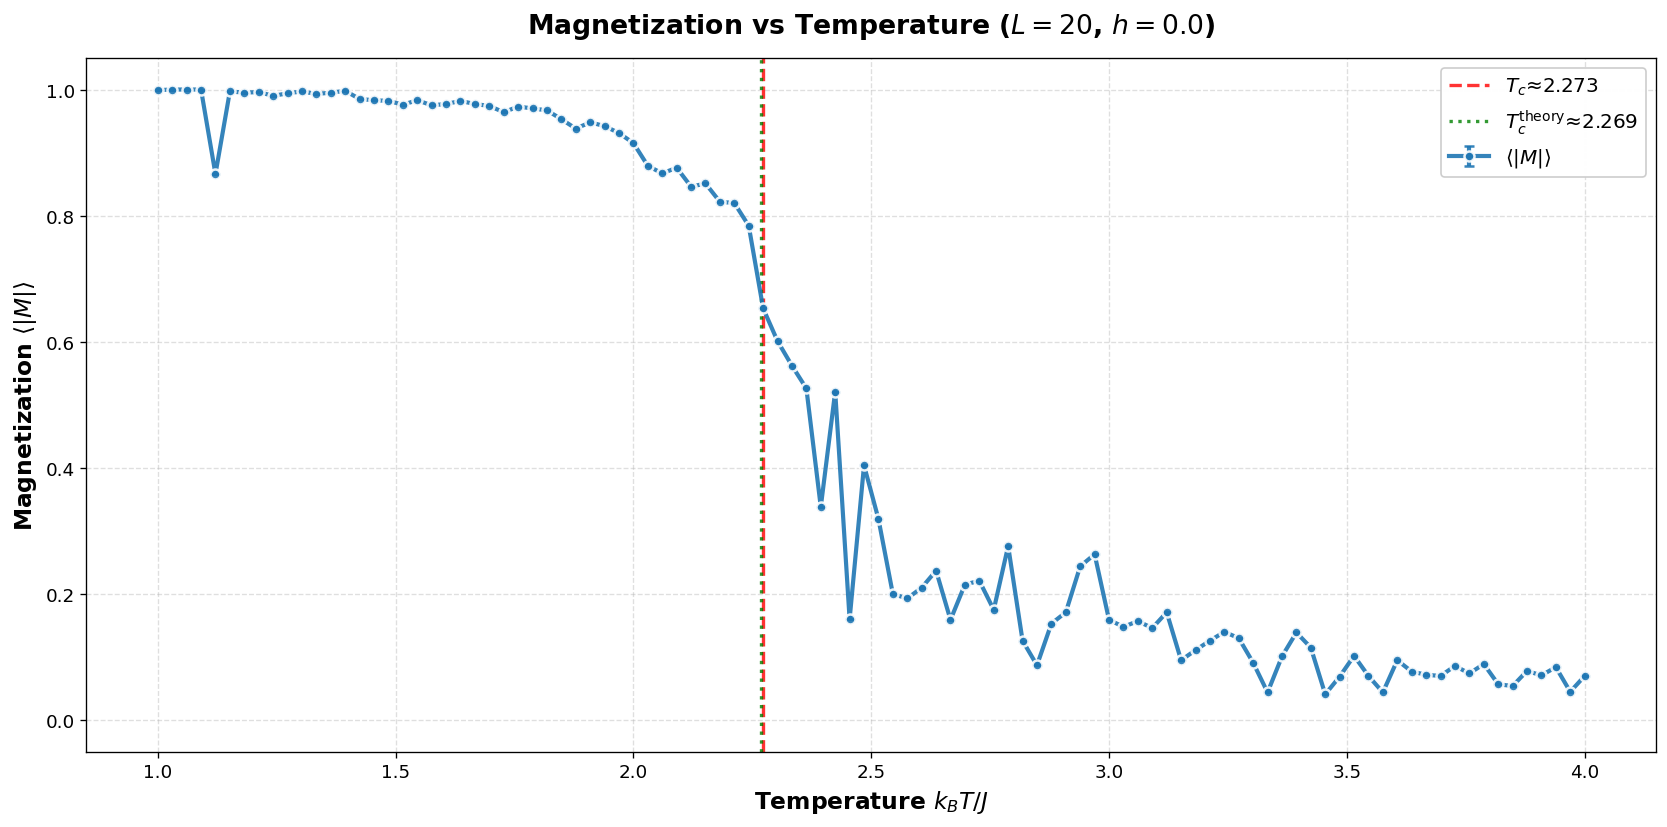


Phase Identification

Low Temperature (T < T_c): <M> = 0.949 (Ferromagnetic)
High Temperature (T > T_c): <M> = 0.168 (Paramagnetic)


In [6]:
import numpy as np
import matplotlib.pyplot as plt


# ============================================================================
# Task 4: Find Critical Temperature (OPTIMIZED VERSION)
# ============================================================================

def temperature_sweep_fast(L, temp_values, h=0.0, J=1.0, num_sweeps=100, num_runs=3):
    """
    Faster temperature sweep with reduced parameters
    """
    magnetizations = []
    
    print(f"Temperature sweep for L = {L}, h = {h}")
    print(f"Running {num_runs} independent simulations per temperature...")
    
    for i, kT in enumerate(temp_values):
        # Multiple runs for better statistics
        mags_at_temp = []
        
        for run in range(num_runs):
            # Create fresh lattice
            lattice = IsingLattice(L=L, J=J, kT=kT, h=h, initial_state='random')
            
            # Equilibrate (shorter for speed)
            lattice.metropolis()
            
            # Measure magnetization
            mag = abs(np.mean(lattice._spin_array))
            mags_at_temp.append(mag)
        
        # Average over runs
        avg_mag = np.mean(mags_at_temp)
        std_mag = np.std(mags_at_temp)
        magnetizations.append((avg_mag, std_mag))
        
        # Progress indicator
        progress = (i + 1) / len(temp_values) * 100
        print(f"  [{progress:5.1f}%] kT = {kT:.3f}: <M> = {avg_mag:.4f} ± {std_mag:.4f}")
    
    magnetizations = np.array(magnetizations)
    return magnetizations[:, 0], magnetizations[:, 1]


def find_critical_temperature(temp_values, magnetizations, degree=8):
    """
    Fit M(T) with a smooth polynomial (NumPy only) and extract critical temperature
    from the point of maximum slope (largest |dM/dT|).
    """
    T = np.array(temp_values)
    M = np.array(magnetizations)

    # --- Polynomial fit ---
    coeffs = np.polyfit(T, M, deg=degree)
    poly = np.poly1d(coeffs)

    # --- Evaluate smooth fitted curve ---
    M_fit = poly(T)

    # --- Compute derivative dM/dT analytically from poly derivative ---
    poly_deriv = np.polyder(poly)
    dM_dT = poly_deriv(T)

    # --- Critical temperature = temperature where slope is steepest ---
    # Because M decreases with temperature, maximum slope = most negative derivative
    idx_crit = np.argmin(dM_dT)
    T_c = T[idx_crit]

    return T_c, dM_dT#M_fit, dM_dT


if __name__ == "__main__":
    
    # ========================================================================
    # REDUCED Parameters for faster execution
    # ========================================================================
    L = 20          # Smaller lattice (was 20)
    J = 1.0
    h = 0.0
    
    # Fewer temperature points
    temp_values = np.linspace(1.0, 4.0, 100)  # Was 40, now 25
    
    print("="*70)
    print("Task 4: Critical Temperature of Ising Model (Fast Version)")
    print("="*70)
    print(f"System size: L = {L}")
    print(f"Coupling: J = {J}")
    print(f"Magnetic field: h = {h}")
    print(f"Temperature points: {len(temp_values)}")
    print(f"Theoretical critical temperature: kT_c ≈ 2.269")
    print("="*70 + "\n")
    
    # ========================================================================
    # Run Temperature Sweep (FASTER)
    # ========================================================================
    
    mag_avg, mag_std = temperature_sweep_fast(
        L, temp_values, h=h, J=J, 
        num_sweeps=100,  # Was 2000, now 500
        num_runs=5       # Was 5, now 3
    )
    
    # ========================================================================
    # Find Critical Temperature
    # ========================================================================
    
    T_c, dM_dT = find_critical_temperature(temp_values, mag_avg)
    
    print("\n" + "="*70)
    print(f"Estimated Critical Temperature: kT_c ≈ {T_c:.3f}")
    print(f"Theoretical Value: kT_c ≈ 2.269")
    print(f"Difference: {abs(T_c - 2.269):.3f}")
    print("="*70)
    
    # ========================================================================
    # Plot Results
    # ========================================================================
    
    fig, (ax1) = plt.subplots(figsize=(14, 7), dpi=120)
    
    # --- Plot 1: Magnetization vs Temperature ---
    ax1.errorbar(temp_values, mag_avg, yerr=0, 
                 fmt='o-', color='#1f77b4', linewidth=2.5, markersize=6,
                 markeredgewidth=1.5, markeredgecolor='white',
                 capsize=3, capthick=1.5, alpha=0.9,
                 label='$\\langle |M| \\rangle$')
    
    ax1.axvline(x=T_c, color='red', linestyle='--', linewidth=2, 
                label=f'$T_c ≈ {T_c:.3f}$', alpha=0.8)
    ax1.axvline(x=2.269, color='green', linestyle=':', linewidth=2, 
                label='$T_c^{\\mathrm{theory}} ≈ 2.269$', alpha=0.8)
    
    ax1.set_xlabel('Temperature $k_BT/J$', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Magnetization $\\langle |M| \\rangle$', fontsize=14, fontweight='bold')
    ax1.set_title(f'Magnetization vs Temperature ($L={L}$, $h={h}$)', 
                  fontsize=16, fontweight='bold', pad=15)
    
    ax1.grid(True, linestyle='--', alpha=0.4)
    ax1.legend(fontsize=12, framealpha=0.98, loc='upper right')
    ax1.set_ylim(-0.05, 1.05)
    ax1.tick_params(axis='both', which='major', labelsize=11)

    '''
    # --- Plot 2: Susceptibility ---
    ax2.plot(temp_values, -dM_dT, 'o-', color='#d62728', linewidth=2.5,
             markersize=6, markeredgewidth=1.5, markeredgecolor='white',
             alpha=0.9, label='$-dM/dT$')
    
    ax2.axvline(x=T_c, color='red', linestyle='--', linewidth=2, 
                label=f'$T_c ≈ {T_c:.3f}$', alpha=0.8)
    
    ax2.set_xlabel('Temperature $k_BT/J$', fontsize=14, fontweight='bold')
    ax2.set_ylabel('$-dM/dT$ (a.u.)', fontsize=14, fontweight='bold')
    ax2.set_title('Magnetic Susceptibility', fontsize=16, fontweight='bold', pad=15)
    
    ax2.grid(True, linestyle='--', alpha=0.4)
    ax2.legend(fontsize=12, framealpha=0.98, loc='upper right')
    ax2.tick_params(axis='both', which='major', labelsize=11)
    
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_linewidth(1.3)'''
    
    plt.tight_layout()
    plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/plots/task4_critical_temperature.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\nPlot saved as 'task4_critical_temperature.png'")
    plt.show()
    
    # ========================================================================
    # Summary
    # ========================================================================
    
    print("\n" + "="*70)
    print("Phase Identification")
    print("="*70)
    
    low_temp_mag = mag_avg[temp_values < T_c].mean()
    high_temp_mag = mag_avg[temp_values > T_c].mean()
    
    print(f"\nLow Temperature (T < T_c): <M> = {low_temp_mag:.3f} (Ferromagnetic)")
    print(f"High Temperature (T > T_c): <M> = {high_temp_mag:.3f} (Paramagnetic)")
    print("="*70)

---
## Task 5 Bonus

Explore the physics of your final object-oriented model. You may wish to consider the eﬀect of:

* system size and shape
* initial state
* number of Metropolis samples
* sweeping through lattice sites sequentially or randomly
* other lattice geometries (e.g. hexagonal, triangular, etc.)
* diﬀerent boundary conditions
* methods to visualise the microstate
* ...

feel free to explore and get creative!

Some ideas - 

record how many times each spin site flips, then graph this as a heat map to visualise boudaries?


map a photo as a steady state by programming the external field to be the strength of pixels of a black and white image.


virtual polling for elections.

In [7]:
from PIL import Image
import numpy as np

def load_image(path, L, invert=False, h0=2.0):
    """
    Load image, convert to grayscale, resize to L×L, and map pixel intensity → magnetic field.
    
    Parameters
    ----------
    path : str
        Path to image (.png, .jpg)
    L : int
        Lattice size
    invert : bool
        If True: white → spin -1, black → spin +1
        If False: white → spin +1, black → spin -1 (default)
    h0 : float
        Maximum field magnitude
    
    Returns
    -------
    h : ndarray (L, L)
        Local magnetic field
    gray : ndarray (L, L)
        Normalized grayscale version of image
    """
    # Load and convert to grayscale
    img = Image.open(path).convert("L")
    
    # Resize
    img = img.resize((L, L), Image.LANCZOS)
    
    # Convert to np array with values in [0, 1]
    gray = np.asarray(img, dtype=np.float32) / 255.0

    # Optionally invert black/white meaning
    if invert:
        gray = 1 - gray

    # Map grayscale ∈ [0,1] → field ∈ [-h0, +h0]
    h = h0 * (2*gray - 1)  # -1 = black, +1 = white

    return h, gray


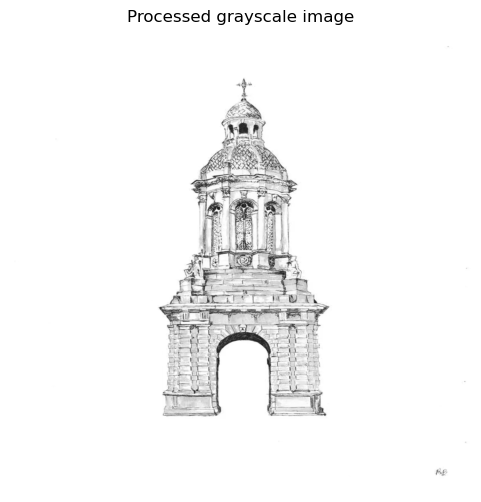

In [8]:
if __name__ == "__main__":
    L = 1240
    h, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L)

    plt.figure(figsize=(6,6))
    plt.imshow(h, cmap="gray")
    plt.title("Processed grayscale image")
    plt.axis("off")
    plt.show()
    

In [9]:
def simulated_annealing(L, T_start=4.0, T_end=0.1, cooling_steps=100, 
                       sweeps_per_temp=100, h=0.0, J=1.0, 
                       initial_state='random', cooling='exponential'):
    """
    Simulated annealing: gradually cool system to find ground state
    
    Parameters:
    -----------
    L : int
        Lattice size
    T_start : float
        Starting (high) temperature
    T_end : float
        Ending (low) temperature
    cooling_steps : int
        Number of temperature steps
    sweeps_per_temp : int
        Monte Carlo sweeps at each temperature
    h : float
        External magnetic field
    J : float
        Coupling constant
    initial_state : str or np.ndarray
        Initial spin configuration
    cooling : str
        Cooling schedule: 'exponential' or 'linear'
        
    Returns:
    --------
    lattice : IsingLattice
        Final annealed lattice
    temp_history : np.ndarray
        Temperature at each step
    energy_history : np.ndarray
        Energy at each step
    mag_history : np.ndarray
        Magnetization at each step
    """
    # Create temperature schedule
    if cooling == 'exponential':
        temp_schedule = np.geomspace(T_start, T_end, cooling_steps)
    elif cooling == 'linear':
        temp_schedule = np.linspace(T_start, T_end, cooling_steps)
    else:
        raise ValueError("cooling must be 'exponential' or 'linear'")
    
    # Initialize lattice at high temperature
    lattice = IsingLattice(L=L, J=J, kT=T_start, h=h, initial_state=initial_state)
    
    # History tracking
    temp_history = []
    energy_history = []
    mag_history = []
    
    print("="*70)
    print("SIMULATED ANNEALING")
    print("="*70)
    print(f"Temperature: {T_start:.2f} → {T_end:.2f}")
   #print(f"Magnetic field: h = {h}")
    print(f"Cooling steps: {cooling_steps}")
    print(f"Sweeps per temperature: {sweeps_per_temp}")
    print(f"Cooling schedule: {cooling}")
    print("="*70)
    
    # Annealing loop
    for i, kT in enumerate(temp_schedule):
        lattice.set_temperature(kT)

        # Count flips
        flips_this_temp = []
        for _ in range(sweeps_per_temp):
            flips_this_temp.append(lattice.metropolis())

        # Record observables
        current_energy = lattice.energy()
        current_mag = np.mean(lattice._spin_array)

        temp_history.append(float(kT))
        energy_history.append(float(current_energy))
        mag_history.append(float(current_mag))

        # Progress report
        progress = (i + 1) / cooling_steps * 100
        print(f"  [{progress:5.1f}%] T = {kT:6.3f}, "
            f"E = {current_energy:8.1f}, M = {current_mag:6.3f}")
        print(f"        → Spin flips at this temperature: {flips_this_temp}")

    
    print("="*70)
    print(f"FINAL STATE:")
    print(f"  Temperature: T = {T_end:.3f}")
    print(f"  Energy: E = {energy_history[-1]:.1f}")
    print(f"  Magnetization: M = {mag_history[-1]:.3f}")
    print("="*70)
    
    return (lattice, 
            np.array(temp_history), 
            np.array(energy_history), 
            np.array(mag_history))


def analyze_annealing_with_initial_state(initial_lattice, final_lattice, save_path=None):
    """
    Compare initial and final lattice states and compute integrals
    
    Parameters:
    -----------
    initial_lattice : IsingLattice
        The initial lattice state (before annealing)
    final_lattice : IsingLattice
        The final annealed lattice state
    save_path : str, optional
        Path to save the figure
    """
    L = final_lattice.L
    
    # Get spin arrays
    initial_spins = initial_lattice._spin_array
    final_spins = final_lattice._spin_array
    
    # Box width
    box_width = 1.0
    
    # Compute integrals for both states
    integral_initial = np.sum(initial_spins, axis=0) * box_width
    integral_final = np.sum(final_spins, axis=0) * box_width
    
    x_coords = np.arange(L)
    
    # Create figure
    fig = plt.figure(figsize=(14, 12), dpi=120)
    gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.25)
    
    # ========================================
    # Plot 1: Initial Lattice
    # ========================================
    ax1 = fig.add_subplot(gs[0, 0])
    im1 = ax1.imshow(initial_spins, cmap='gray', interpolation='nearest', 
                     vmin=-1, vmax=1, aspect='equal')
    ax1.set_title(f'Initial State (T = {initial_lattice.kT:.2f})', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
    cbar1.set_ticks([-1, 1])
    
    # ========================================
    # Plot 2: Final Lattice
    # ========================================
    ax2 = fig.add_subplot(gs[0, 1])
    im2 = ax2.imshow(final_spins, cmap='gray', interpolation='nearest', 
                     vmin=-1, vmax=1, aspect='equal')
    ax2.set_title(f'Final State (T = {final_lattice.kT:.2f})', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)
    cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8)
    cbar2.set_ticks([-1, 1])
    
    # ========================================
    # Plot 3: Initial Integral
    # ========================================
    ax3 = fig.add_subplot(gs[1, 0])
    colors_init = ['red' if val < 0 else 'blue' for val in integral_initial]
    ax3.bar(x_coords, integral_initial, width=0.8, color=colors_init, 
            alpha=0.7, edgecolor='black', linewidth=0.5)
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax3.set_title('Initial Column Integrals', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Column x', fontsize=12)
    ax3.set_ylabel('$\\int$ Spin dy', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # ========================================
    # Plot 4: Final Integral
    # ========================================
    ax4 = fig.add_subplot(gs[1, 1])
    colors_final = ['red' if val < 0 else 'blue' for val in integral_final]
    ax4.bar(x_coords, integral_final, width=0.8, color=colors_final, 
            alpha=0.7, edgecolor='black', linewidth=0.5)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_title('Final Column Integrals', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Column x', fontsize=12)
    ax4.set_ylabel('$\\int$ Spin dy', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # ========================================
    # Plot 5: Comparison of Integrals
    # ========================================
    ax5 = fig.add_subplot(gs[2, :])
    ax5.plot(x_coords, integral_initial, 'o--', color='orange', 
             linewidth=2, markersize=5, alpha=0.8, label='Initial State')
    ax5.plot(x_coords, integral_final, 's-', color='green', 
             linewidth=2, markersize=5, alpha=0.8, label='Final State (Annealed)')
    ax5.axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    ax5.set_title('Comparison: Initial vs Final Column Integrals', 
                  fontsize=14, fontweight='bold')
    ax5.set_xlabel('Column Position x', fontsize=12)
    ax5.set_ylabel('$\\int$ Spin(x,y) dy', fontsize=12)
    ax5.legend(fontsize=12, loc='best')
    ax5.grid(True, alpha=0.3)
    
    # ========================================
    # Statistics
    # ========================================
    stats_text = (
        f"Initial State:\n"
        f"  Total: {np.sum(integral_initial):.1f}\n"
        f"  Mean: {np.mean(integral_initial):.2f}\n"
        f"\n"
        f"Final State:\n"
        f"  Total: {np.sum(integral_final):.1f}\n"
        f"  Mean: {np.mean(integral_final):.2f}\n"
        f"\n"
        f"Change:\n"
        f"  ΔTotal: {np.sum(integral_final) - np.sum(integral_initial):.1f}\n"
        f"  ΔMean: {np.mean(integral_final) - np.mean(integral_initial):.2f}"
    )
    
    fig.text(0.98, 0.02, stats_text, 
             fontsize=9, ha='right', va='bottom',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    fig.suptitle(f'Annealing Analysis: Initial vs Final (L={L}, h={final_lattice.h})', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"[Saved] Comparison analysis → {save_path}")
    
    plt.show()
    
    # Print statistics
    print("\n" + "="*70)
    print("INITIAL vs FINAL STATE COMPARISON")
    print("="*70)
    print(f"Magnetic field: h = {final_lattice.h}")
    print(f"\nInitial State:")
    print(f"  Total integral: {np.sum(integral_initial):.2f}")
    print(f"  Mean per column: {np.mean(integral_initial):.2f}")
    print(f"\nFinal State (Annealed):")
    print(f"  Total integral: {np.sum(integral_final):.2f}")
    print(f"  Mean per column: {np.mean(integral_final):.2f}")
    print(f"\nChange:")
    print(f"  ΔTotal: {np.sum(integral_final) - np.sum(integral_initial):.2f}")
    print(f"  |ΔTotal|: {abs(np.sum(integral_final) - np.sum(integral_initial)):.2f}")
    print("="*70)
    
    return {
        'initial_integral': integral_initial,
        'final_integral': integral_final,
        'change': integral_final - integral_initial
    }

'''
def plot_annealing_results(temps, energies, mags, lattice, save_path=None):
    """
    Plot simulated annealing results
    
    Parameters:
    -----------
    temps : array
        Temperature history
    energies : array
        Energy history
    mags : array
        Magnetization history
    lattice : IsingLattice
        Final lattice state
    save_path : str, optional
        Path to save figure
    """
    fig = plt.figure(figsize=(14, 10), dpi=120)
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Temperature schedule
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(temps, 'o-', color='orange', linewidth=2, markersize=4, alpha=0.8)
    ax1.set_ylabel('Temperature $k_BT$', fontsize=12, fontweight='bold')
    ax1.set_title('Cooling Schedule', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.4)
    ax1.set_xlim(0, len(temps)-1)
    
    # Plot 2: Energy evolution
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(energies, 'o-', color='black', linewidth=2, markersize=4, alpha=0.8)
    ax2.set_ylabel('Energy $E$', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Step', fontsize=12)
    ax2.set_title('Energy Minimization', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.4)
    
    # Plot 3: Magnetization evolution
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(mags, 'o-', color='black', linewidth=2, markersize=4, alpha=0.8)
    ax3.set_ylabel('Magnetization $M$', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Step', fontsize=12)
    ax3.set_title('Magnetization Evolution', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.4)
    
    # Plot 4: Final spin configuration
    ax4 = fig.add_subplot(gs[2, :])
    im = ax4.imshow(lattice._spin_array, cmap='gray', interpolation='nearest', vmin=-1, vmax=1)
    ax4.set_title(f'Final Spin Configuration (T = {temps[-1]:.3f})', 
                  fontsize=14, fontweight='bold')
    ax4.set_xlabel('x', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)
    cbar = plt.colorbar(im, ax=ax4, label='Spin')
    cbar.set_ticks([-1, 1])
    
    # Overall title
    fig.suptitle(f'Simulated Annealing Results (L={lattice.L})', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"\nPlot saved to: {save_path}")
    
    plt.show()
'''

def plot_annealing_results(temps, energies, mags, lattice, save_path=None,
                           final_spin_pdf="final_spin_configuration.pdf"):
    """
    Plot simulated annealing results AND save a clean PDF of the final spin configuration.

    Parameters:
    -----------
    temps : array
        Temperature history
    energies : array
        Energy history
    mags : array
        Magnetization history
    lattice : IsingLattice
        Final lattice state
    save_path : str, optional
        Path to save the combined figure
    final_spin_pdf : str
        Filename for the standalone final-state PDF
    """

    # ======================================================
    # 1) MAIN 4-PANEL FIGURE
    # ======================================================
    fig = plt.figure(figsize=(14, 10), dpi=150)
    gs = fig.add_gridspec(3, 2, hspace=0.32, wspace=0.30)

    # Plot 1: Temperature schedule
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(temps, 'o-', color='tab:orange', linewidth=2, markersize=5, alpha=0.95)
    ax1.set_ylabel('Temperature $k_BT$', fontsize=12, fontweight='bold')
    ax1.set_title('Cooling Schedule', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.35)

    # Plot 2: Energy evolution
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(energies, 'o-', color='tab:blue', linewidth=2, markersize=4, alpha=0.9)
    ax2.set_ylabel('Energy $E$', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Annealing Step', fontsize=12)
    ax2.set_title('Energy Minimization', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.35)

    # Plot 3: Magnetization evolution
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(mags, 'o-', color='tab:red', linewidth=2, markersize=4, alpha=0.9)
    ax3.set_ylabel('Magnetization $M$', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Annealing Step', fontsize=12)
    ax3.set_title('Magnetization Evolution', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.35)

    # Plot 4: Final spin configuration
    ax4 = fig.add_subplot(gs[2, :])
    im = ax4.imshow(lattice._spin_array, cmap='gray', interpolation='nearest',
                    vmin=-1, vmax=1)
    ax4.set_title(
        f'Final Spin Configuration (T = {temps[-1]:.3f})',
        fontsize=14, fontweight='bold'
    )
    ax4.set_xlabel('x', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)

    # A cleaner, nicer looking colorbar
    cbar = plt.colorbar(im, ax=ax4, shrink=0.85, pad=0.02)
    cbar.set_label('Spin Value', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)

    # Global title
    fig.suptitle(
        f'Simulated Annealing Results (L = {lattice.L})',
        fontsize=18, fontweight='bold', y=1.02
    )

    # Save combined figure if requested
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"[Saved] Full annealing results → {save_path}")

    plt.show()


    # ======================================================
    # 2) STANDALONE FINAL SPIN CONFIGURATION PDF
    # ======================================================

    fig2 = plt.figure(figsize=(6, 6), dpi=300)

    plt.imshow(lattice._spin_array,
               cmap='gray',
               interpolation='nearest',
               vmin=-1, vmax=1)

    plt.title(f"Final Spin Configuration (L={lattice.L}, T={temps[-1]:.3f})",
              fontsize=16, fontweight='bold', pad=12)

    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)


    plt.tight_layout()

    fig2.savefig(final_spin_pdf, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close(fig2)

    print(f"[Saved] Final spin PDF → {final_spin_pdf}")




Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Cooling steps: 10
Sweeps per temperature: 2
Cooling schedule: exponential
  [ 10.0%] T =  4.000, E =   7947.8, M =  0.410
        → Spin flips at this temperature: [5874568, 5873844]
  [ 20.0%] T =  2.655, E =  10412.1, M =  0.495
        → Spin flips at this temperature: [4947577, 4943329]
  [ 30.0%] T =  1.762, E =  12278.0, M =  0.563
        → Spin flips at this temperature: [4042925, 4044318]
  [ 40.0%] T =  1.170, E =  14655.8, M =  0.630
        → Spin flips at this temperature: [3163483, 3162511]
  [ 50.0%] T =  0.776, E =  17595.7, M =  0.705
        → Spin flips at this temperature: [2282292, 2274365]
  [ 60.0%] T =  0.515, E =  20149.3, M =  0.767
        → Spin flips at this temperature: [1385350, 1384349]
  [ 70.0%] T =  0.342, E =  23144.2, M =  0.838
        → Spin flips at this temperature: [609363, 608468]
  [ 80.0%] T =  0.227, E =  24492.3, M =  0.870
        → Spin flips at this te

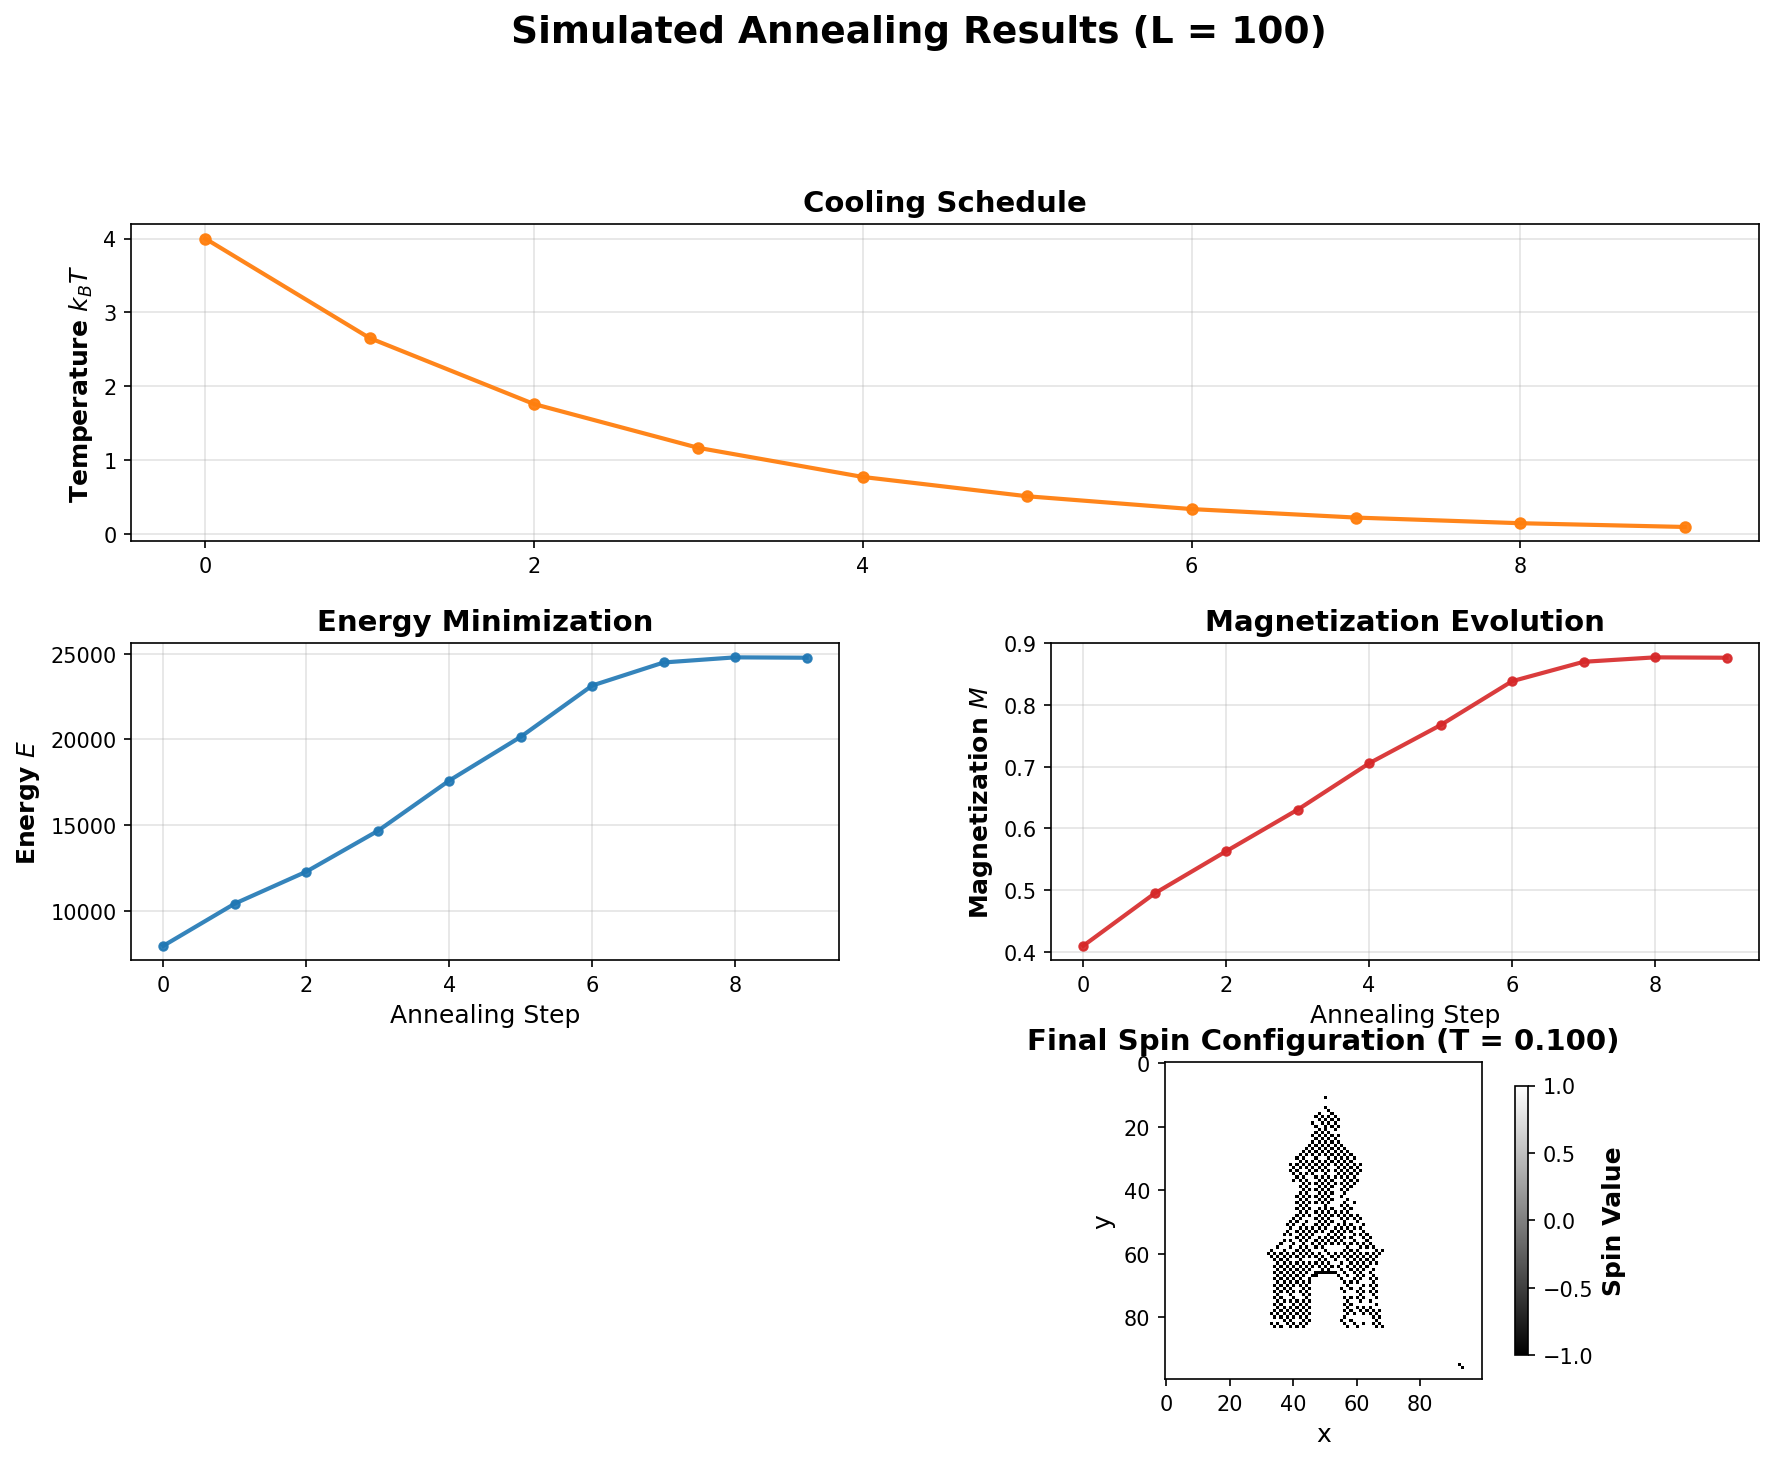

[Saved] Final spin PDF → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/annealing_h05.png


In [10]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L=100, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=100,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=10,
    sweeps_per_temp=2,
    h=h_field,  # Positive field favors spin-up
    J=-0.6,
    initial_state='random',
    cooling='exponential'
)


plot_annealing_results(temps2, energies2, mags2, lattice2,
                      save_path='/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/annealing_h05_metrics.png', 
                      final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/annealing_h05.png"
                      )





Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Cooling steps: 10
Sweeps per temperature: 2
Cooling schedule: exponential
  [ 10.0%] T =  4.000, E = 125659.0, M =  0.305
        → Spin flips at this temperature: [159358339, 159342677]
  [ 20.0%] T =  2.655, E = 159432.2, M =  0.369
        → Spin flips at this temperature: [136351996, 136340757]
  [ 30.0%] T =  1.762, E = 188788.1, M =  0.422
        → Spin flips at this temperature: [112560426, 112569510]
  [ 40.0%] T =  1.170, E = 209645.5, M =  0.463
        → Spin flips at this temperature: [88523553, 88501970]
  [ 50.0%] T =  0.776, E = 216070.2, M =  0.484
        → Spin flips at this temperature: [67030729, 66858267]
  [ 60.0%] T =  0.515, E = 231734.2, M =  0.505
        → Spin flips at this temperature: [50198891, 50168312]
  [ 70.0%] T =  0.342, E = 255849.7, M =  0.528
        → Spin flips at this temperature: [35965261, 35967355]
  [ 80.0%] T =  0.227, E = 275881.6, M =  0.547
        →

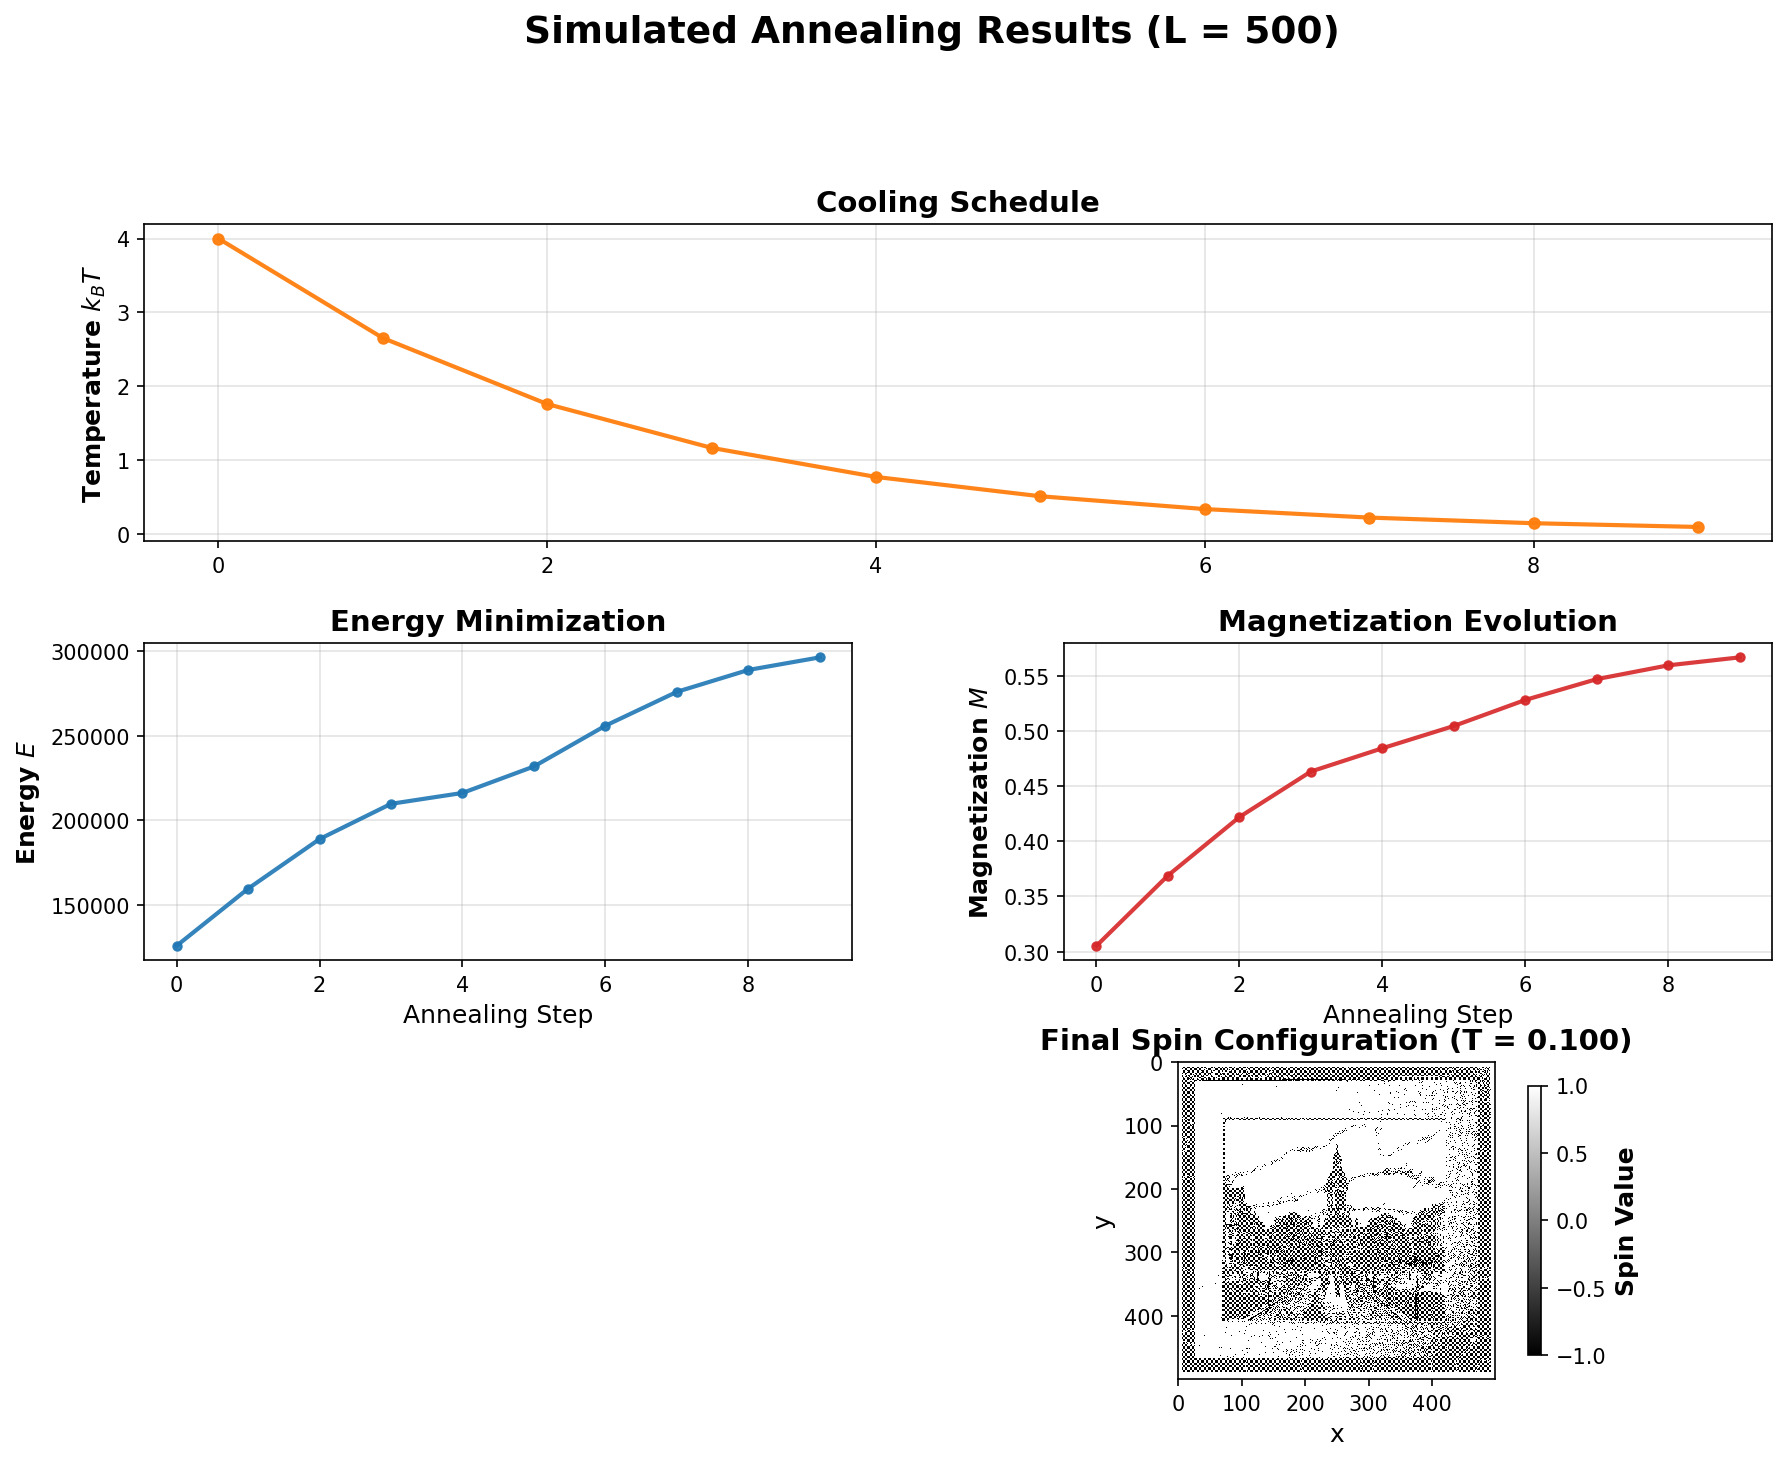

[Saved] Final spin PDF → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd.png


In [11]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/drawingofTcd.jpg.webp", L=500, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=500,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=10,
    sweeps_per_temp=2,
    h=h_field,  # Positive field favors spin-up
    J=-0.6,
    initial_state='random',
    cooling='exponential'
)


plot_annealing_results(
    temps2,
    energies2,
    mags2,
    lattice2,
    save_path="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd_metrics.png",
    final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd.png"
)

[Saved] Full annealing results → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd_metrics.png


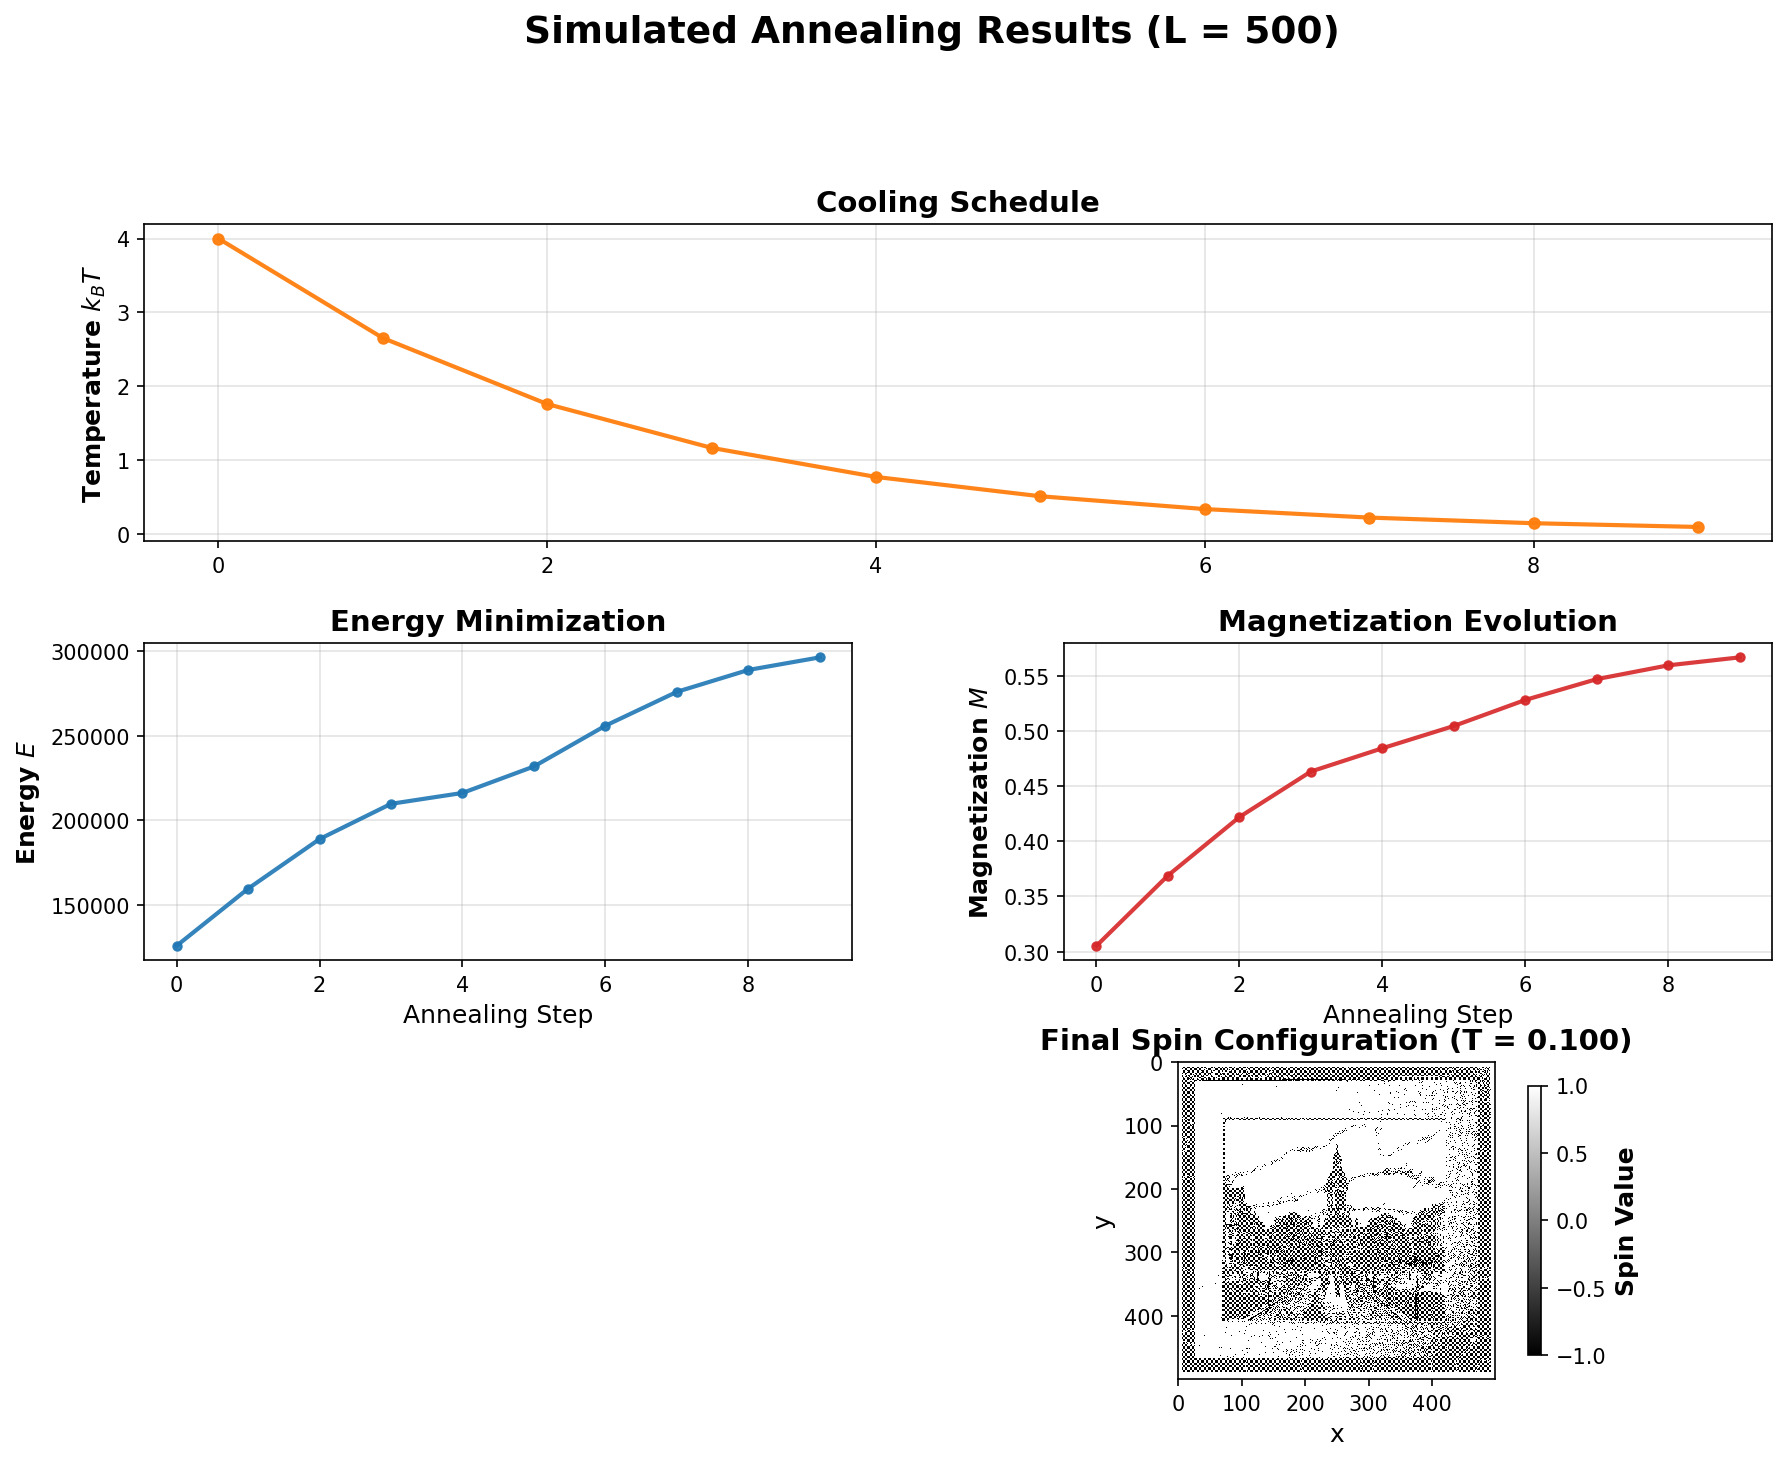

[Saved] Final spin PDF → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd.png


In [12]:
plot_annealing_results(
    temps2,
    energies2,
    mags2,
    lattice2,
    save_path="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd_metrics.png",
    final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/drawingOfTcd.png"
)



Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Cooling steps: 10
Sweeps per temperature: 2
Cooling schedule: exponential
  [ 10.0%] T =  4.000, E =  15058.3, M = -0.039
        → Spin flips at this temperature: [178398230, 178374844]
  [ 20.0%] T =  2.655, E =   8564.0, M = -0.049
        → Spin flips at this temperature: [150560602, 150561922]
  [ 30.0%] T =  1.762, E = -14056.2, M = -0.055
        → Spin flips at this temperature: [112198075, 112131278]
  [ 40.0%] T =  1.170, E = -92215.2, M = -0.073
        → Spin flips at this temperature: [56341302, 54689388]
  [ 50.0%] T =  0.776, E = -152277.5, M = -0.091
        → Spin flips at this temperature: [25227872, 24739949]
  [ 60.0%] T =  0.515, E = -170344.2, M = -0.099
        → Spin flips at this temperature: [14741403, 14663550]
  [ 70.0%] T =  0.342, E = -171356.7, M = -0.106
        → Spin flips at this temperature: [9093393, 9061508]
  [ 80.0%] T =  0.227, E = -169700.5, M = -0.111
       

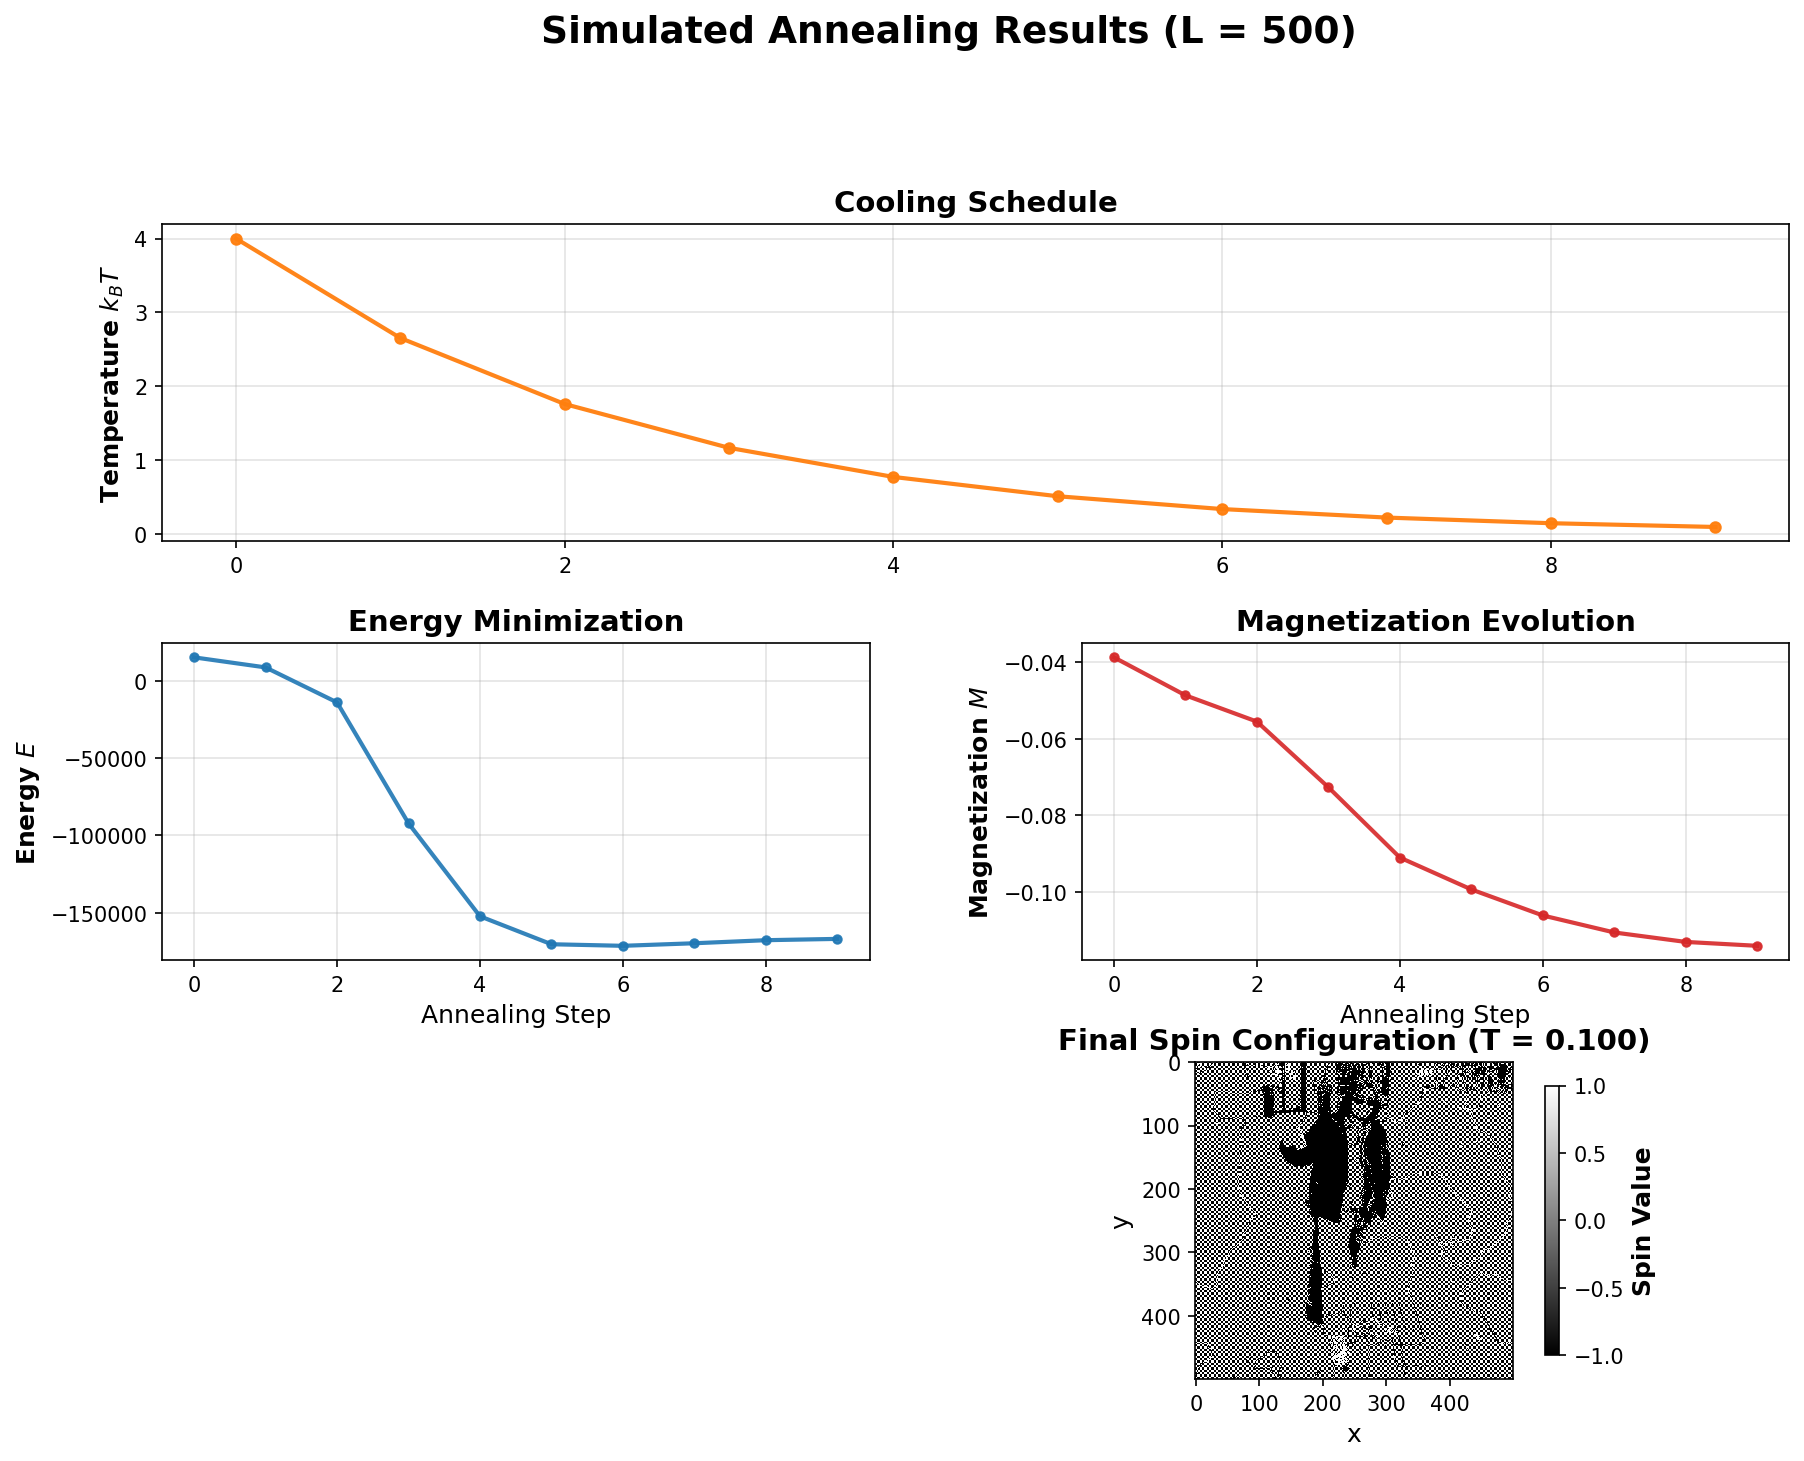

[Saved] Final spin PDF → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/AidenIsing.png


In [13]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Aiden.PNG", L=500, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=500,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=10,
    sweeps_per_temp=2,
    h=h_field,  # Positive field favors spin-up
    J=-0.6,
    initial_state='random',
    cooling='exponential'
)




plot_annealing_results(
    temps2,
    energies2,
    mags2,
    lattice2,
    save_path="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/AidenIsingMetric.PNG",
    final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/AidenIsing.png"
)

In [14]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Tball.jpg", L=500, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=500,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=10,
    sweeps_per_temp=2,
    h=h_field,  # Positive field favors spin-up
    J=-0.6,
    initial_state='random',
    cooling='exponential'
)


plot_annealing_results(
    temps2,
    energies2,
    mags2,
    lattice2,
    save_path="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/TballMetrics.png",
    final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/Tball.png"
)



Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Cooling steps: 10
Sweeps per temperature: 2
Cooling schedule: exponential


KeyboardInterrupt: 



Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Cooling steps: 10
Sweeps per temperature: 2
Cooling schedule: exponential
  [ 10.0%] T =  4.000, E = 317475.9, M = -0.008
        → Spin flips at this temperature: [673426707, 673431685]
  [ 20.0%] T =  2.655, E = 380877.5, M = -0.011
        → Spin flips at this temperature: [577493299, 577511342]
  [ 30.0%] T =  1.762, E = 410077.9, M = -0.019
        → Spin flips at this temperature: [463830131, 463867005]
  [ 40.0%] T =  1.170, E = 302366.0, M = -0.047
        → Spin flips at this temperature: [320573231, 316860816]
  [ 50.0%] T =  0.776, E = 206829.8, M = -0.092
        → Spin flips at this temperature: [225703542, 224339987]
  [ 60.0%] T =  0.515, E = 186836.7, M = -0.128
        → Spin flips at this temperature: [174266031, 174223477]
  [ 70.0%] T =  0.342, E = 215878.0, M = -0.159
        → Spin flips at this temperature: [132883565, 132934350]
  [ 80.0%] T =  0.227, E = 258494.6, M = -0.183
 

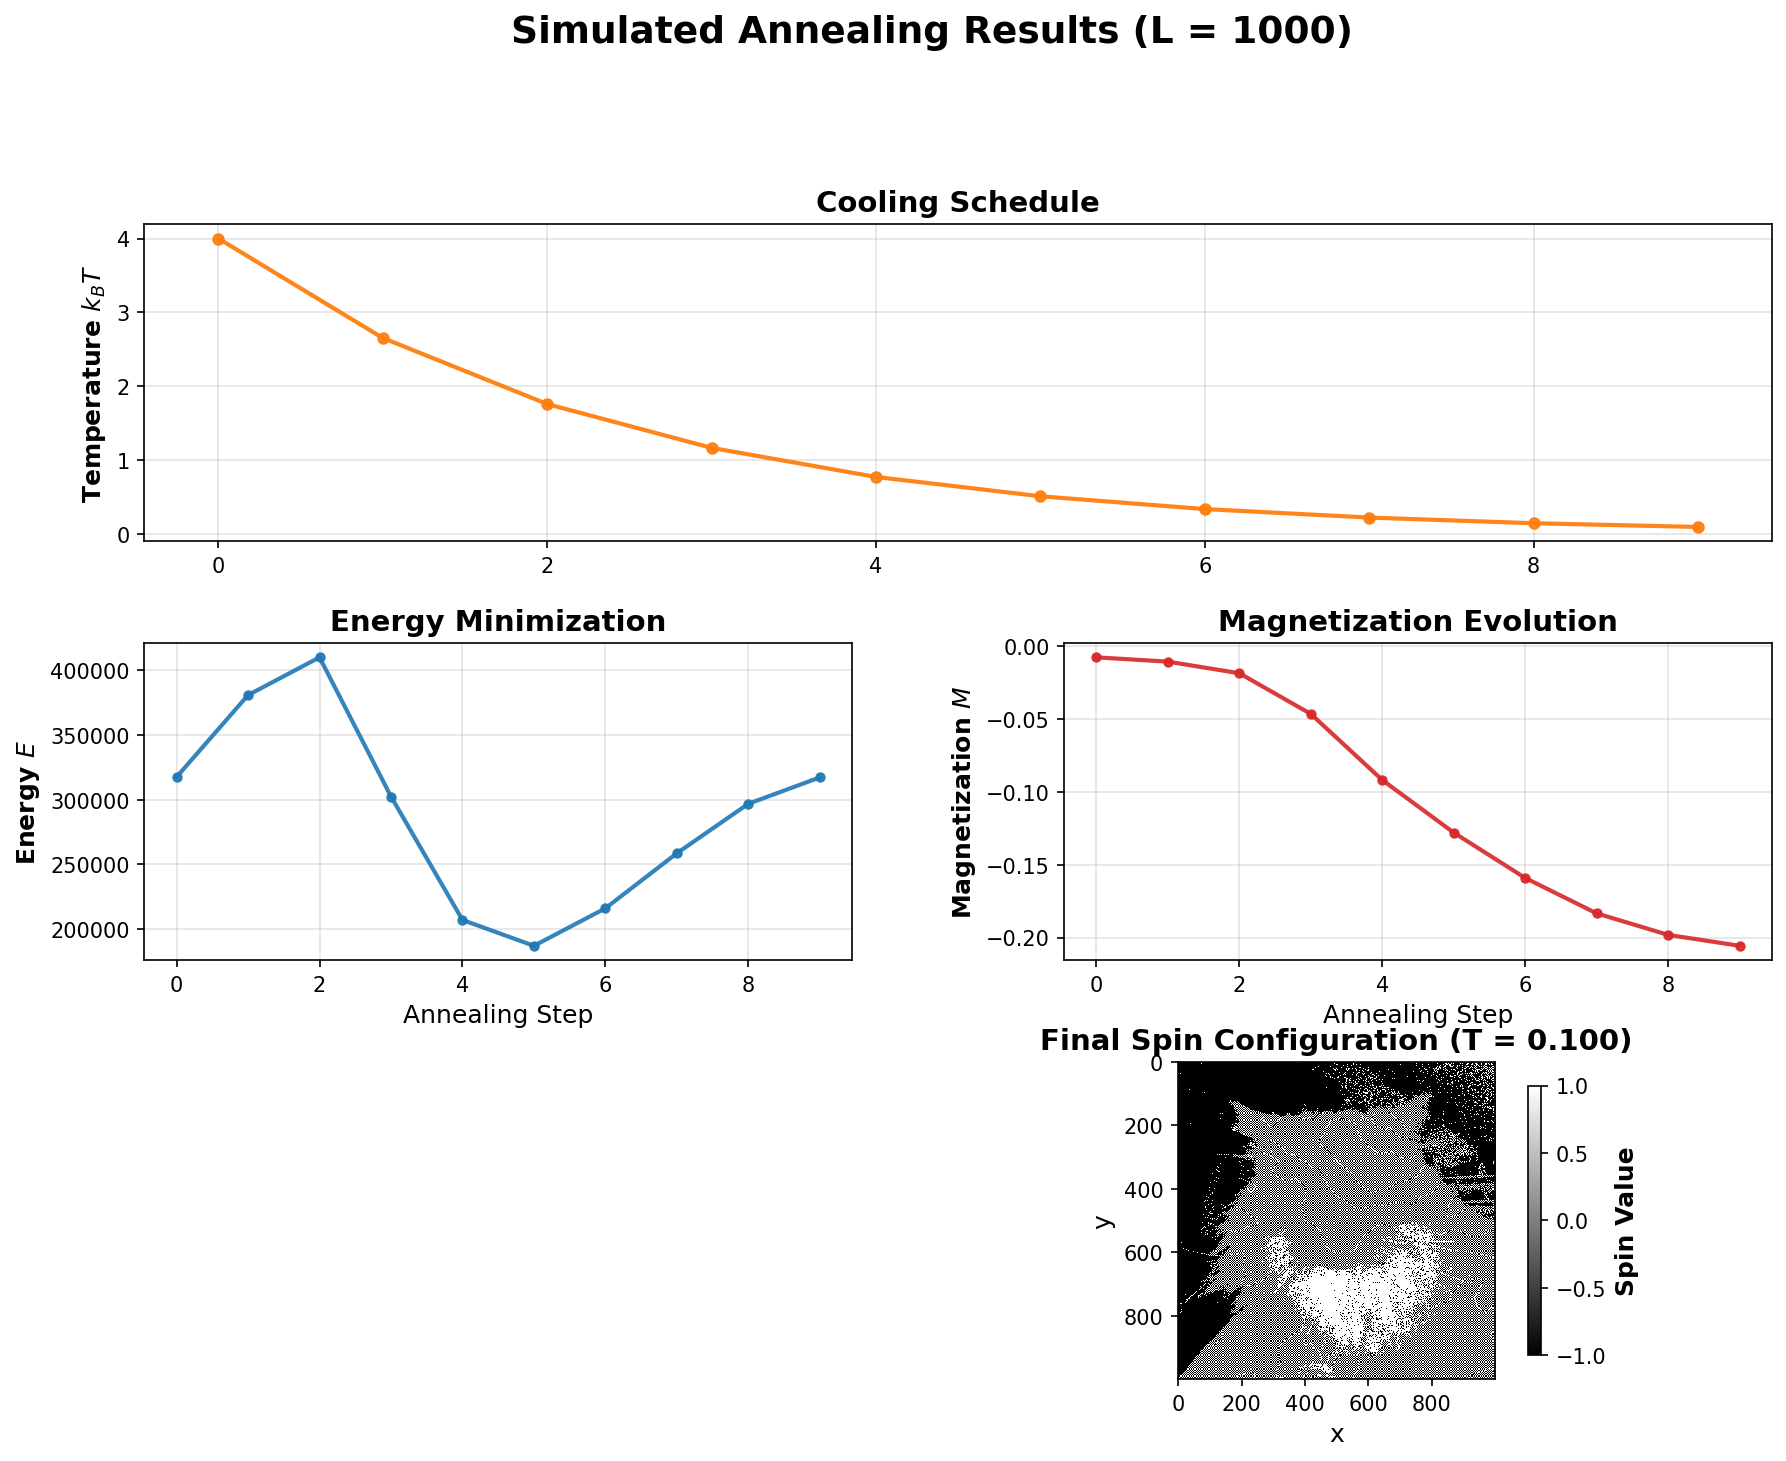

[Saved] Final spin PDF → /Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/iotaIsing.png


: 

In [ ]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/iota.png", L=1000, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=1000,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=10,
    sweeps_per_temp=2,
    h=h_field,  # Positive field favors spin-up
    J=-0.6,
    initial_state='random',
    cooling='exponential'
)


plot_annealing_results(
    temps2,
    energies2,
    mags2,
    lattice2,
    save_path="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/iotalMetrics.png",
    final_spin_pdf="/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/IsingImages/iotaIsing.png"
)